In [ ]:
# Implement Triple Exponential Smoothing and plot the results

# Decompose each product's time series using the available data and Triple Exponential Smoothing
for product in products:
    product_data = monthly_data[monthly_data['Producto'] == product].set_index('Month')
    product_data.index = product_data.index.to_timestamp()

    # Check the number of observations
    if len(product_data) >= 2:  # Ensuring at least two records for basic decomposition
        # Apply Triple Exponential Smoothing
        model = ExponentialSmoothing(product_data['Cantidad'], trend='add', seasonal='add', seasonal_periods=12)
        fit = model.fit()

        # Plot the decomposition and fitted values
        fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
        fig.suptitle(f'Decomposition and Triple Exponential Smoothing of {product}')

        ax[0].plot(product_data.index, fit.level, label='Level', color='blue')
        ax[0].set_title('Level')
        ax[0].legend()

        ax[1].plot(product_data.index, fit.trend, label='Trend', color='orange')
        ax[1].set_title('Trend')
        ax[1].legend()

        ax[2].plot(product_data.index, fit.season, label='Seasonality', color='green')
        ax[2].set_title('Seasonality')
        ax[2].legend()

        ax[3].plot(product_data.index, product_data['Cantidad'], label='Observed', color='black')
        ax[3].plot(product_data.index, fit.fittedvalues, label='Fitted', color='red')
        ax[3].set_title('Observed vs Fitted')
        ax[3].legend()

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()


Tratamiento de datos

In [13]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/2024-2/Mineria/series_tiempo')


import pandas as pd
# Paso 1: Cargar el archivo CSV y eliminar las variables redundantes
file_path = 'input.csv'
df = pd.read_csv(file_path)

# Asignar valor categórico a las variables especificadas
categorical_columns = [
    'Sector', 'Tipo', 'Linea', 'Sublinea', 'Fecha_2', 'Presentacion', 'Gramaje', 'Empresa',
    'Cliente', 'Transaccion', 'Pedido', 'Control', 'Producto', 'Unidad', 'Clave_Cliente',
    'No._Hijos', 'Antiguedad', 'Edad', 'Escolaridad', 'Estado_Civil', 'Estado', 'Sexo', 'Funcion', 'Grupo'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Eliminar las variables redundantes
columns_to_drop = ['Edad_Rango', 'Year', 'Quarter', 'Month', 'Day', 'Dia_Num_Sem', 'Dia_Semana', 'Fecha_2']
df.drop(columns=columns_to_drop, inplace=True)

# Convertir la columna 'Fecha' a formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%m-%y')

df.info()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58903 entries, 0 to 58902
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sector         58903 non-null  category      
 1   Tipo           58903 non-null  category      
 2   Linea          58903 non-null  category      
 3   Sublinea       58903 non-null  category      
 4   Presentacion   58903 non-null  category      
 5   Gramaje        58903 non-null  category      
 6   Empresa        58903 non-null  category      
 7   Año            58903 non-null  int64         
 8   Fecha          58903 non-null  datetime64[ns]
 9   Cliente        58903 non-null  category      
 10  Transaccion    58903 non-null  category      
 11  Pedido         58903 non-null  category      
 12  Control        58903 non-null  category    

Impelementacion del algoritmo

<ipython-input-14-d92eb128942e>:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex=True)


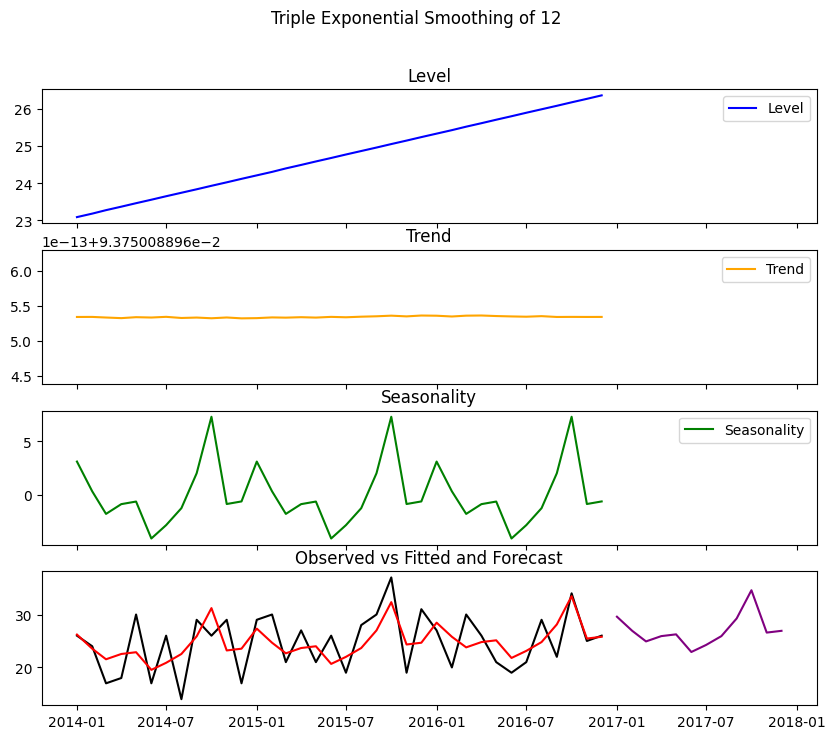

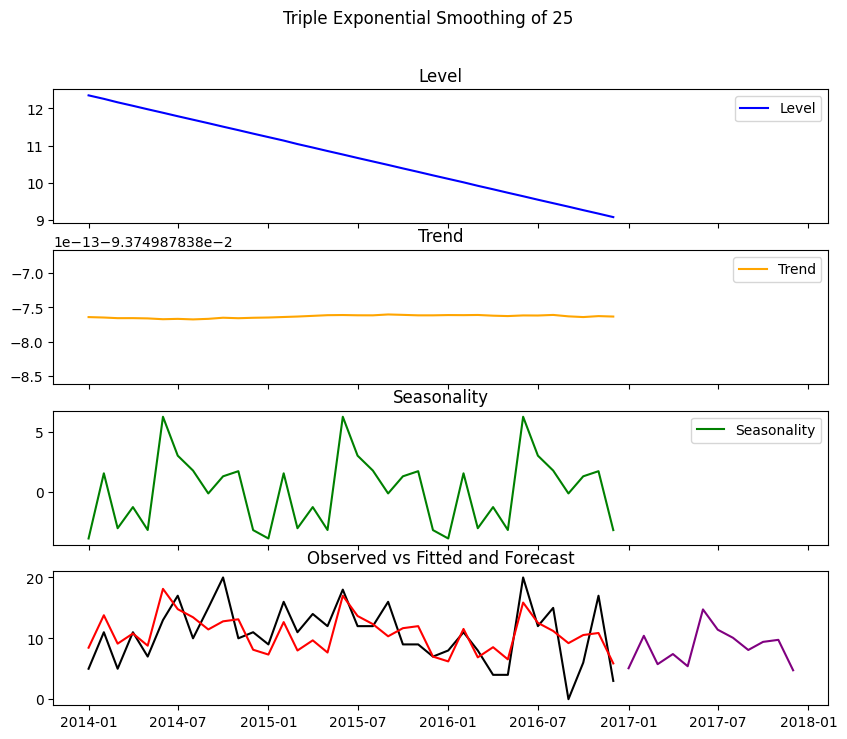

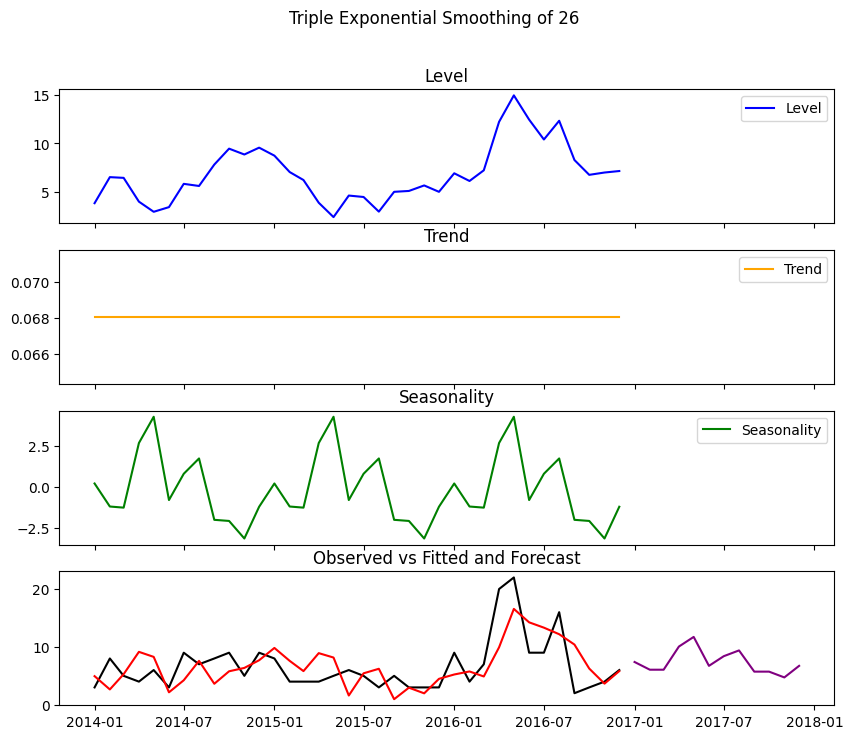

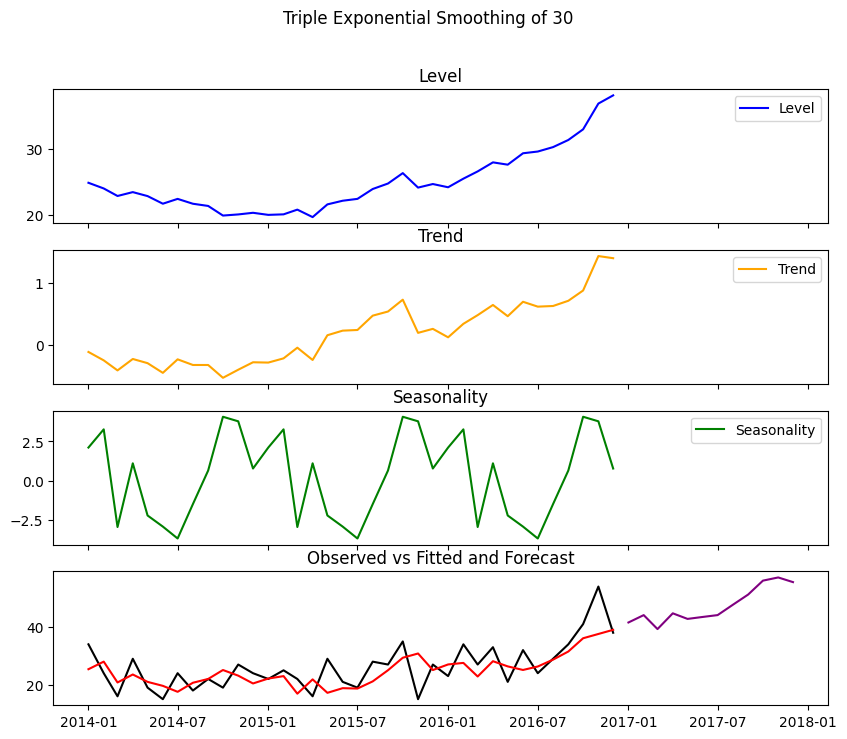

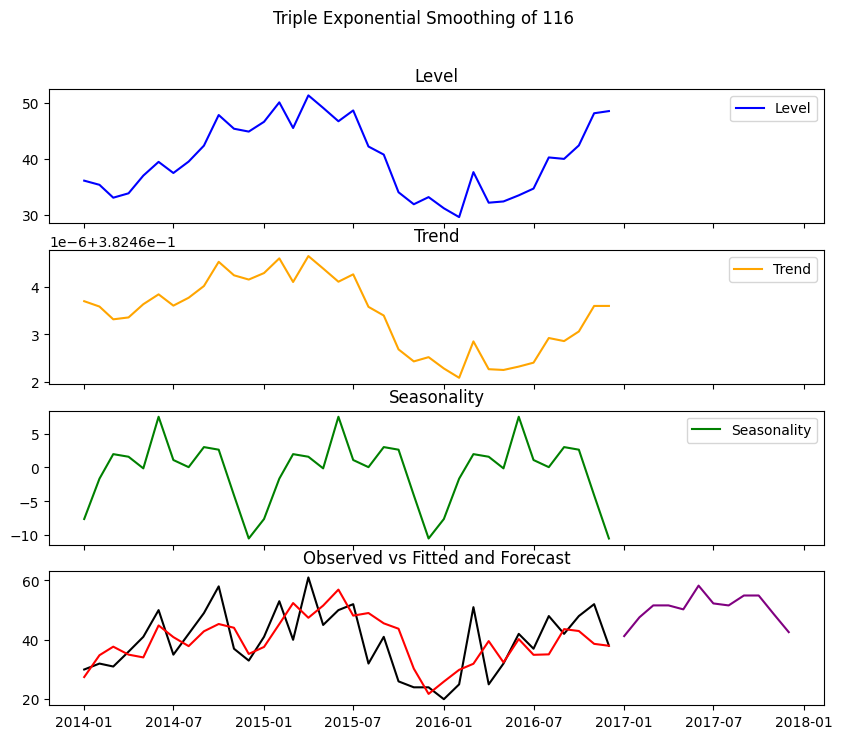

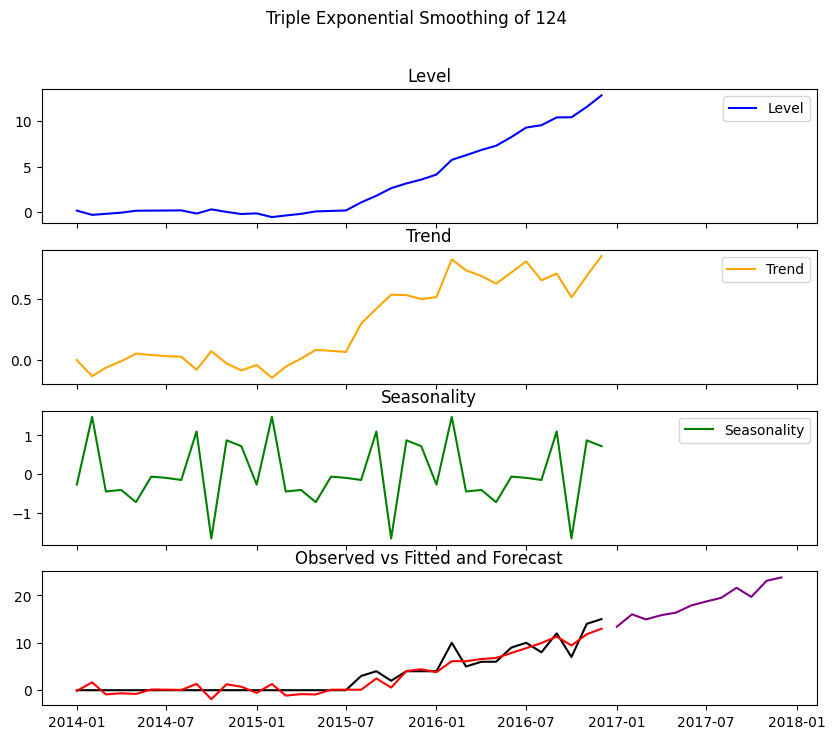

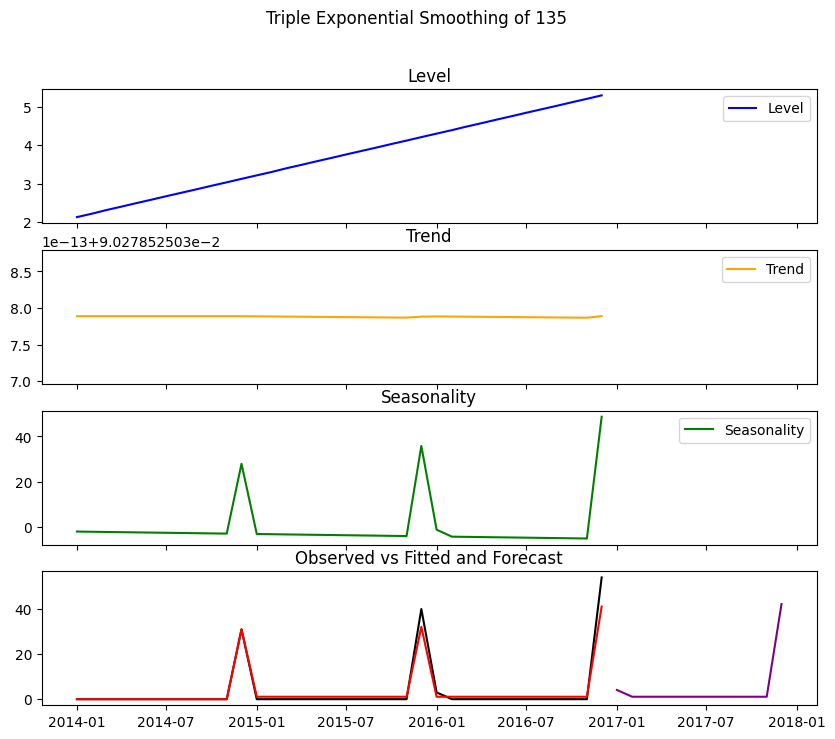

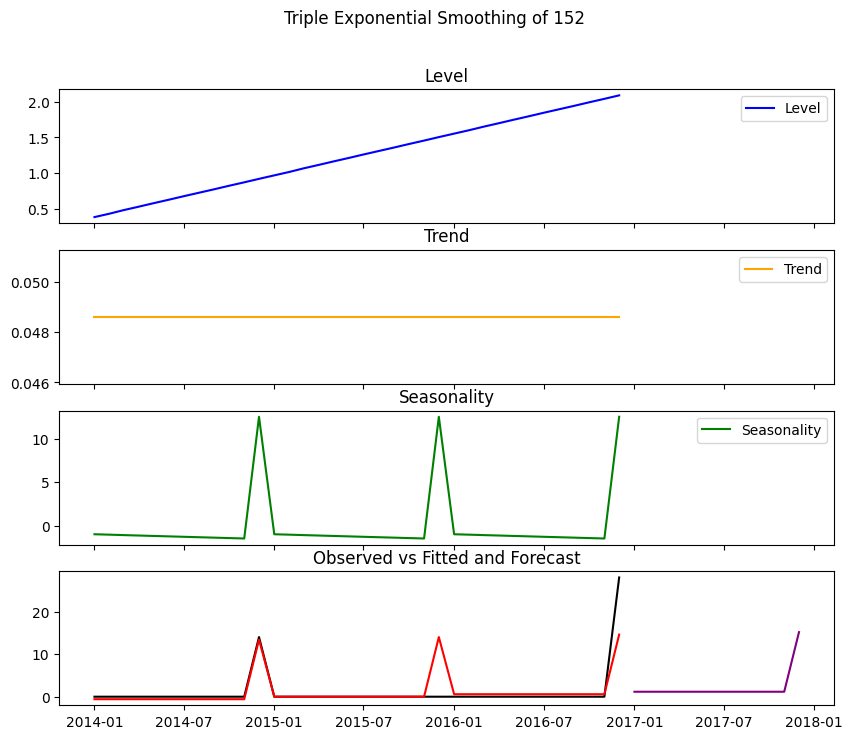

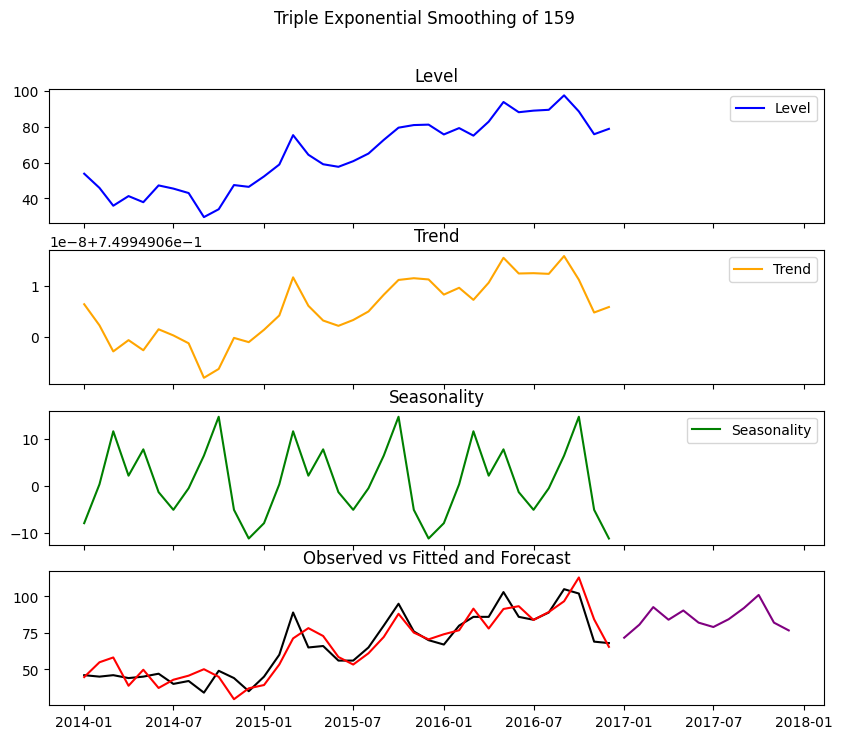

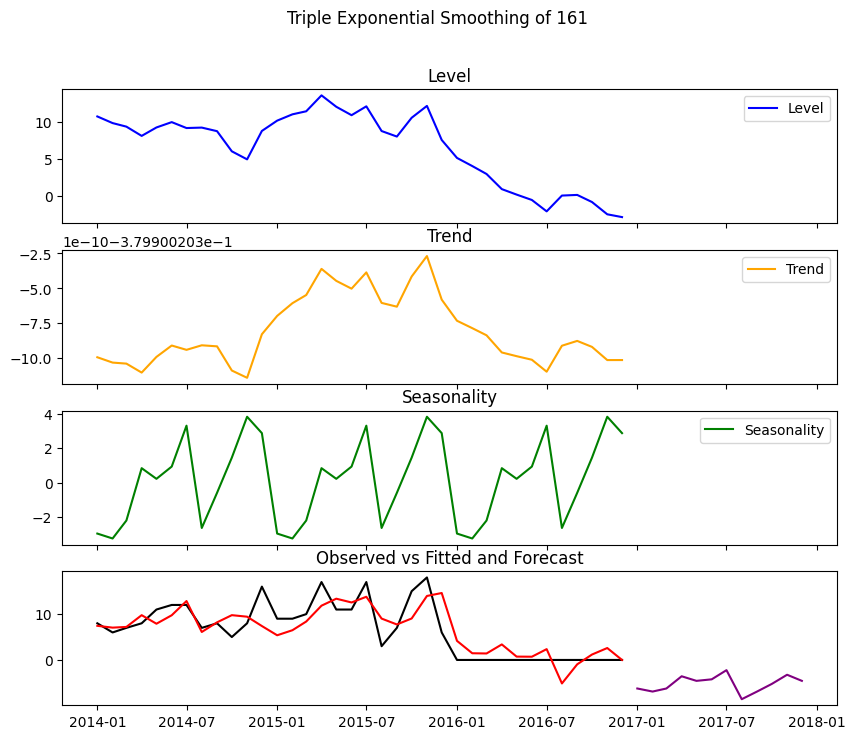

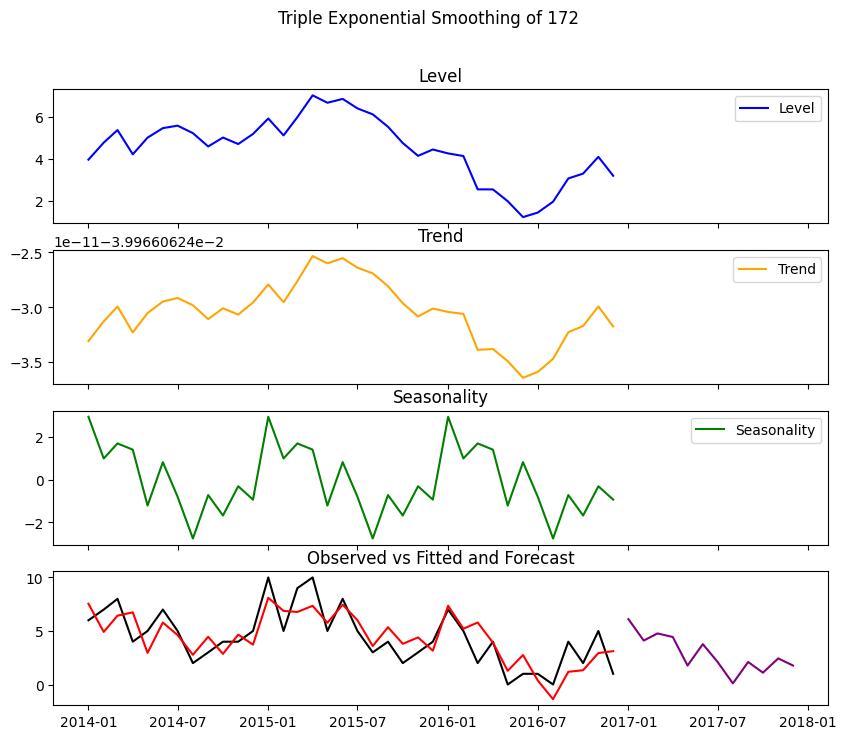

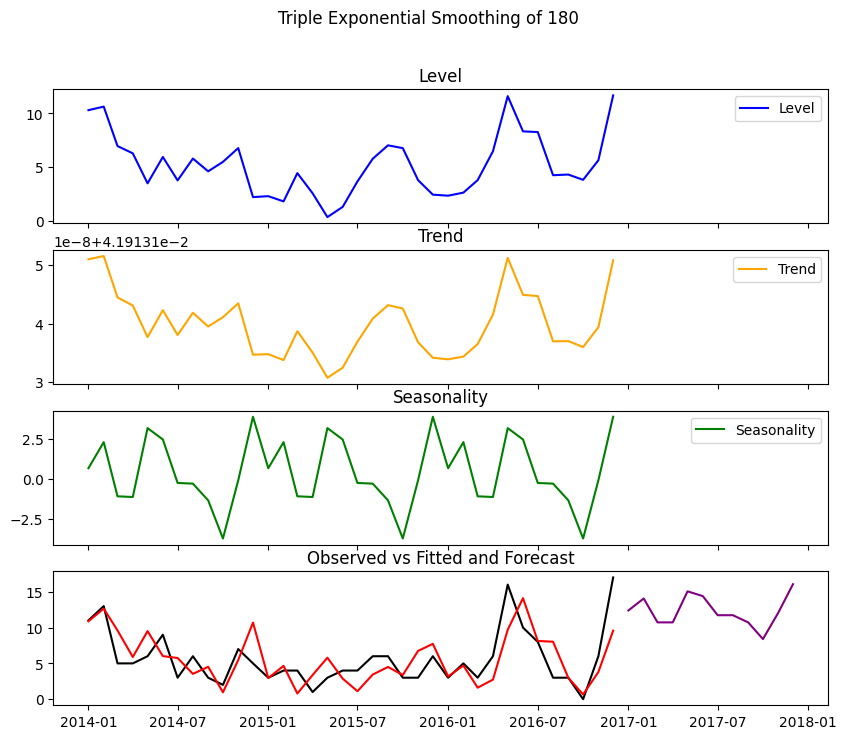

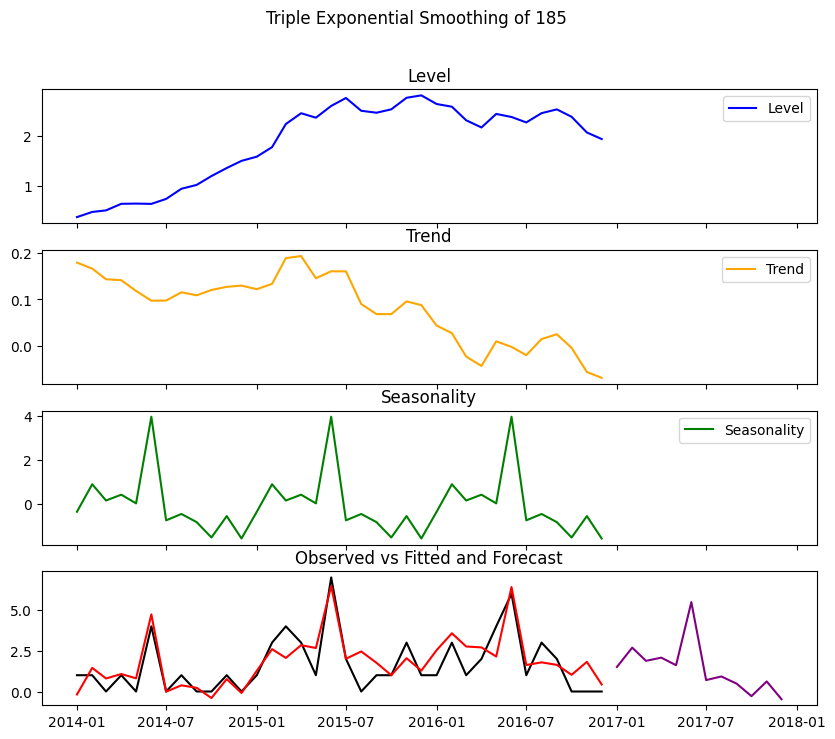

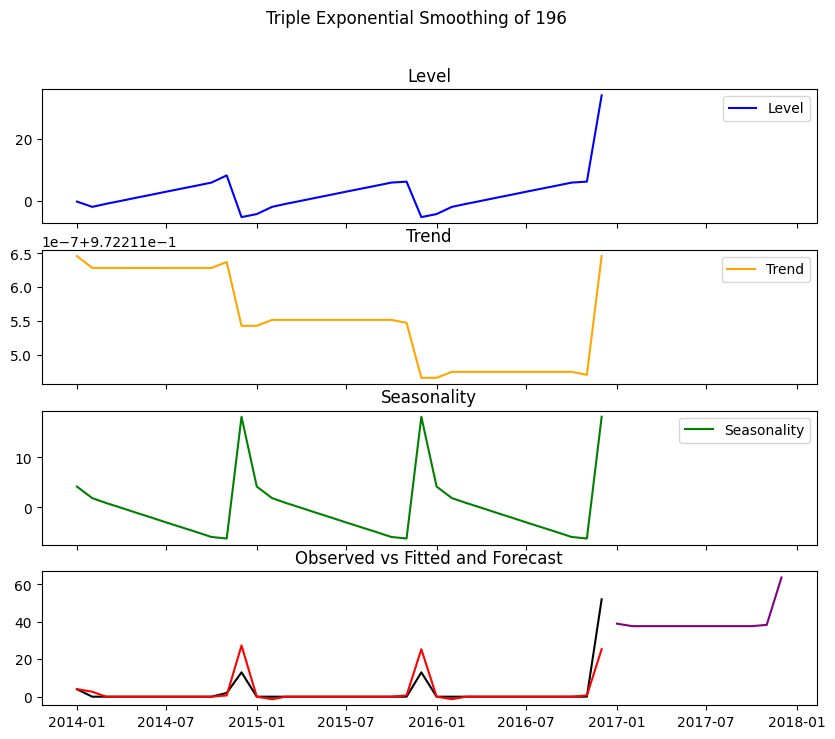

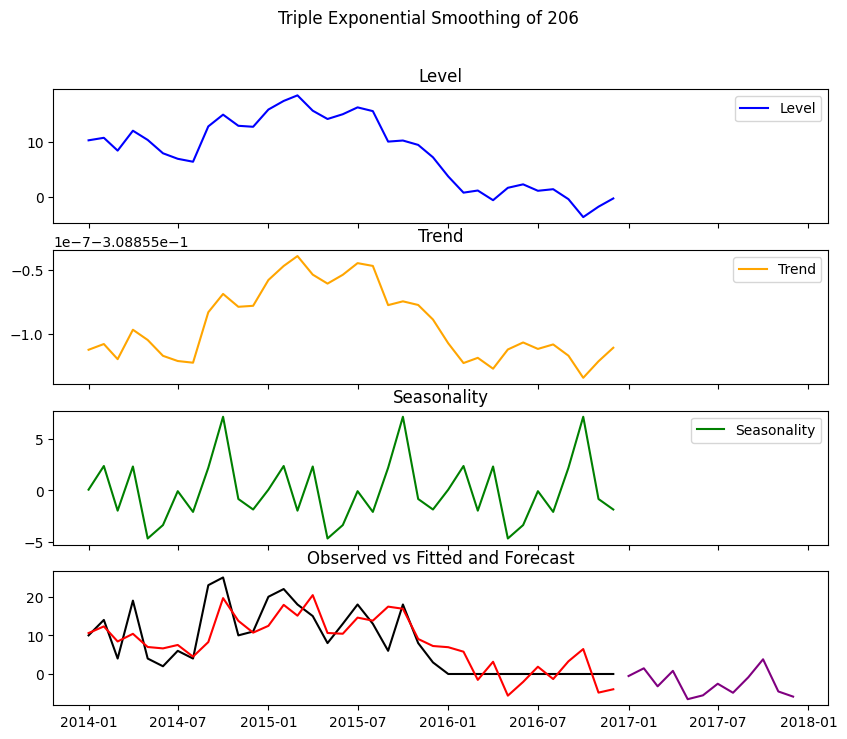

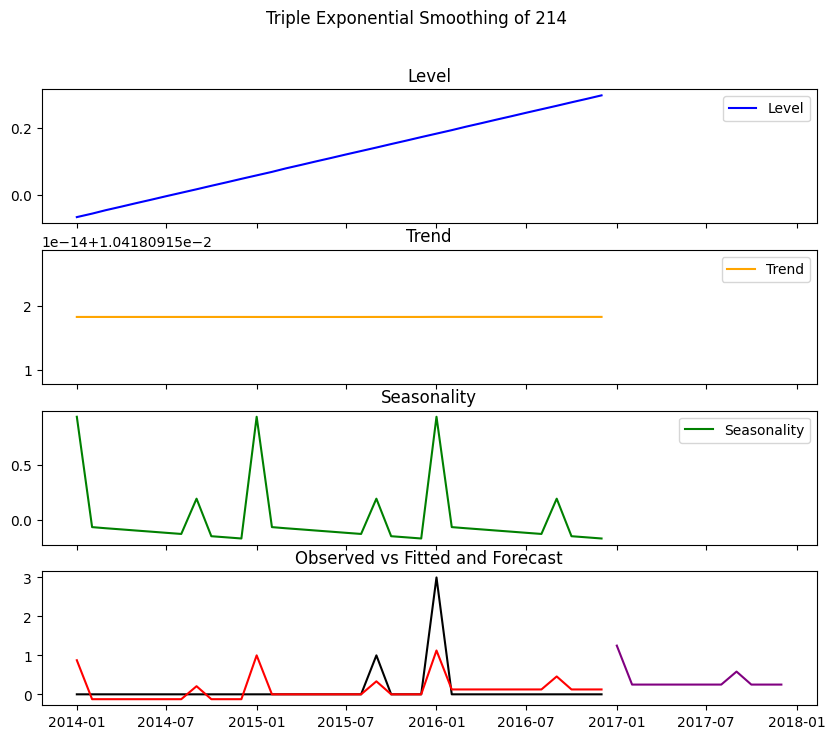

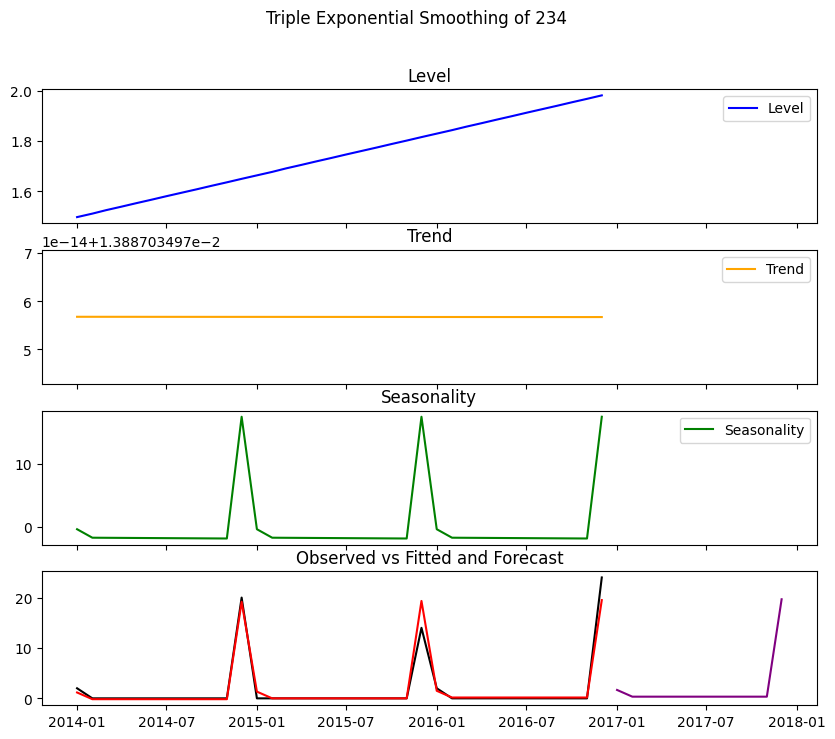

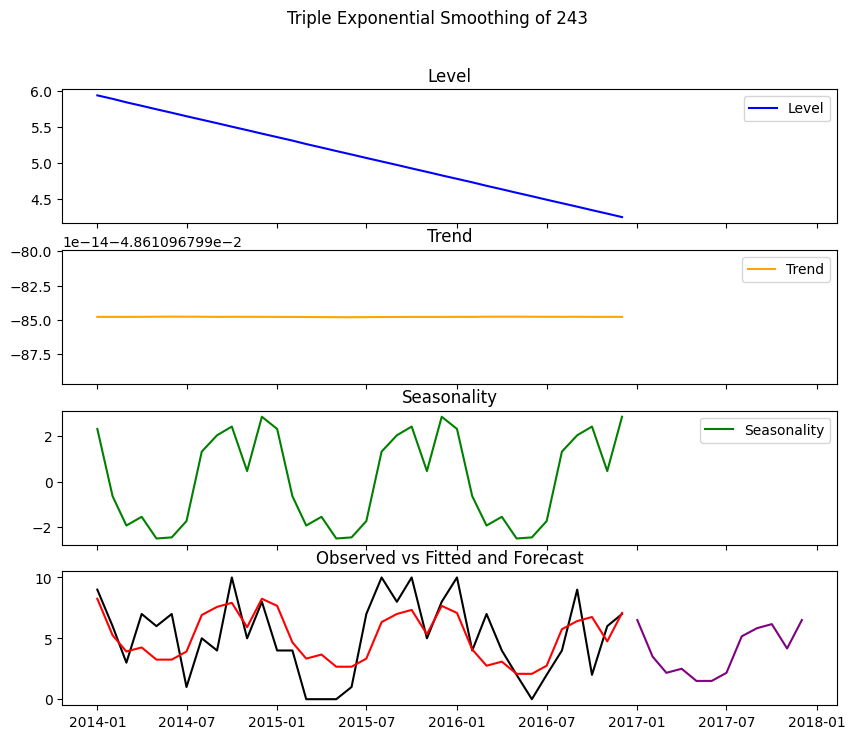

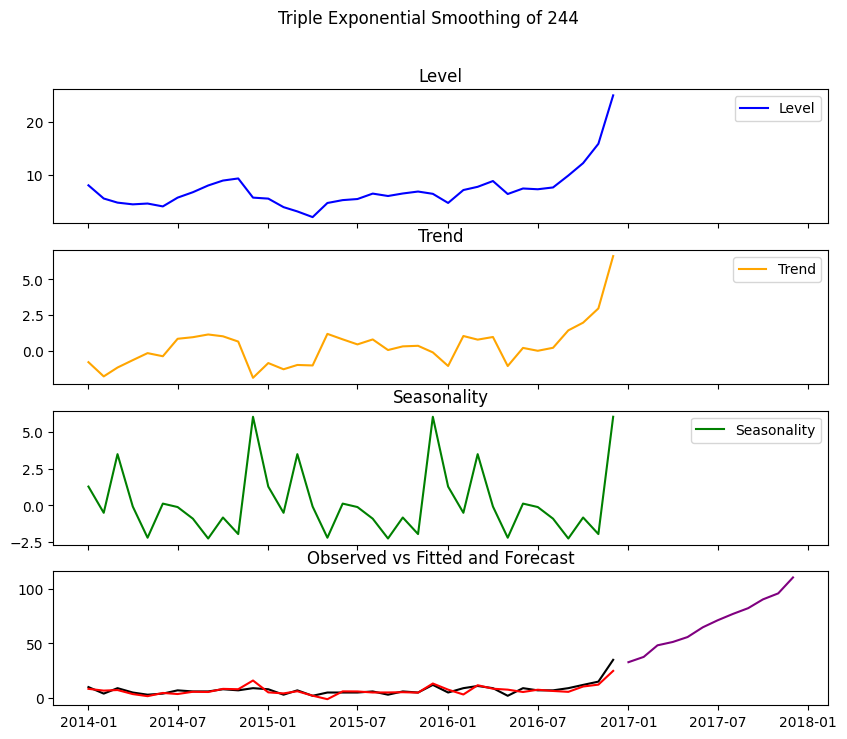

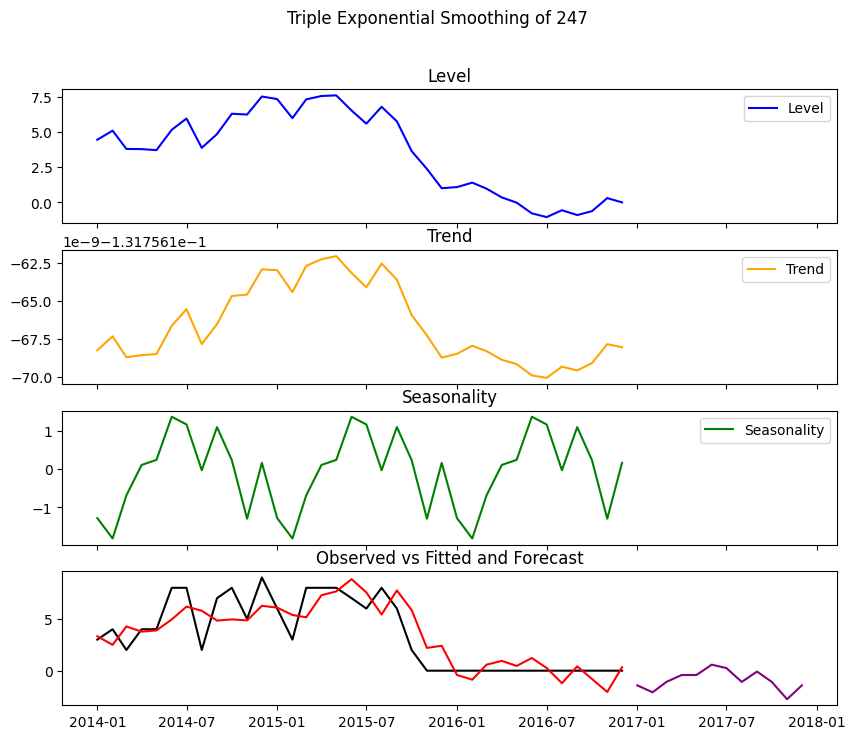

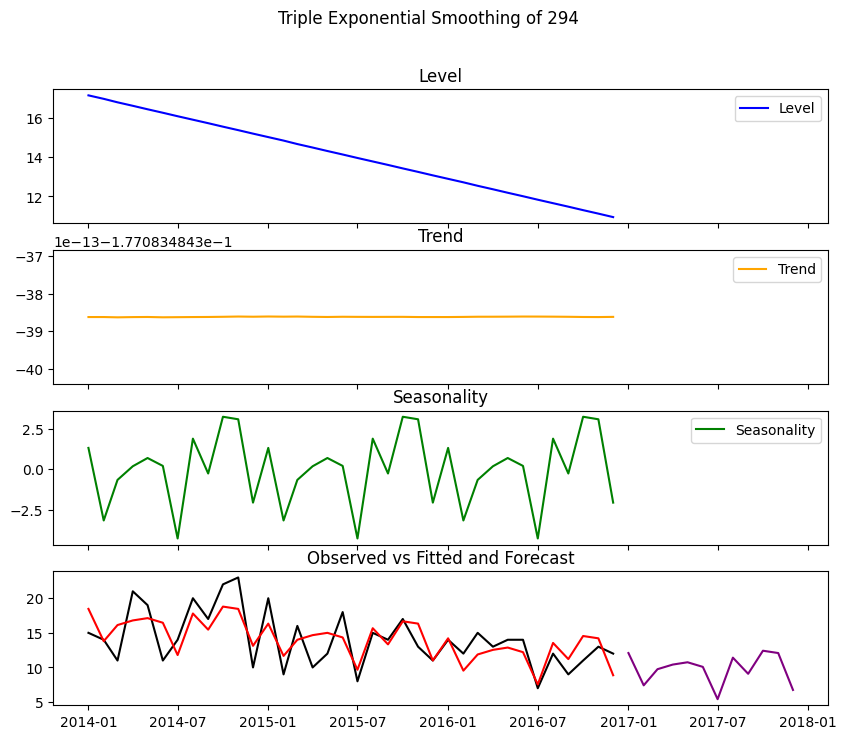

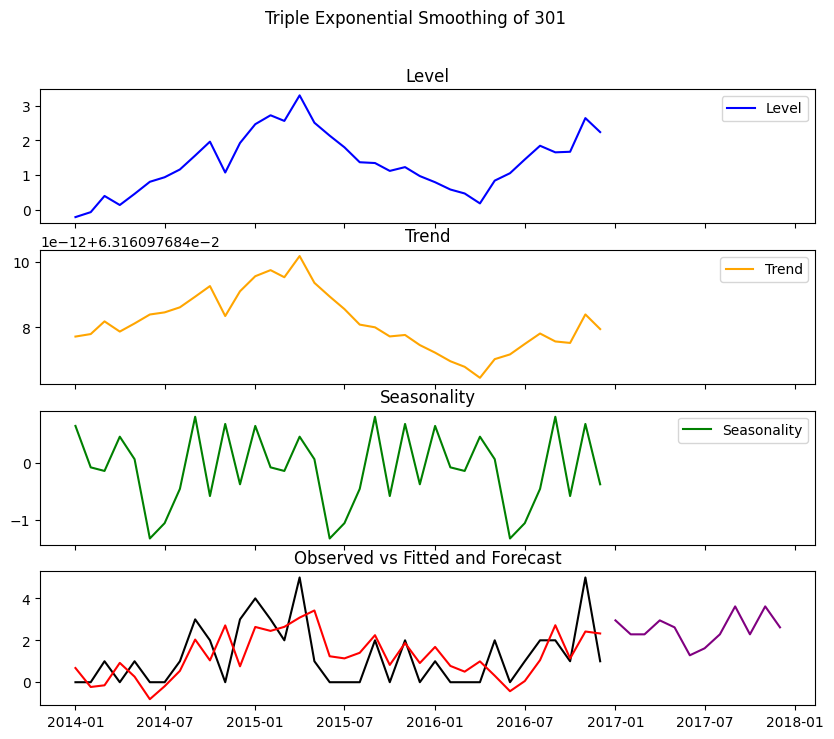

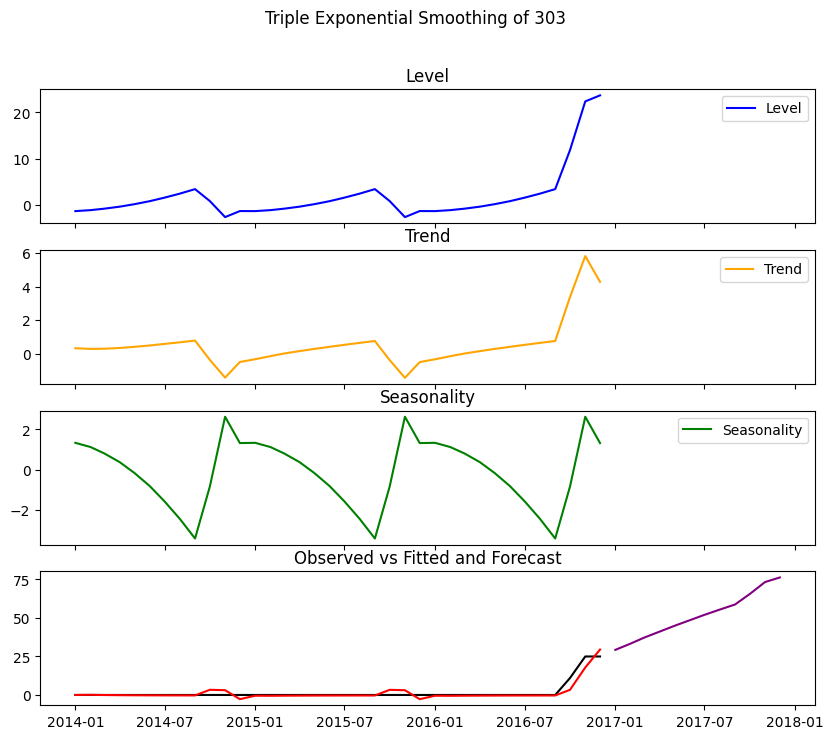

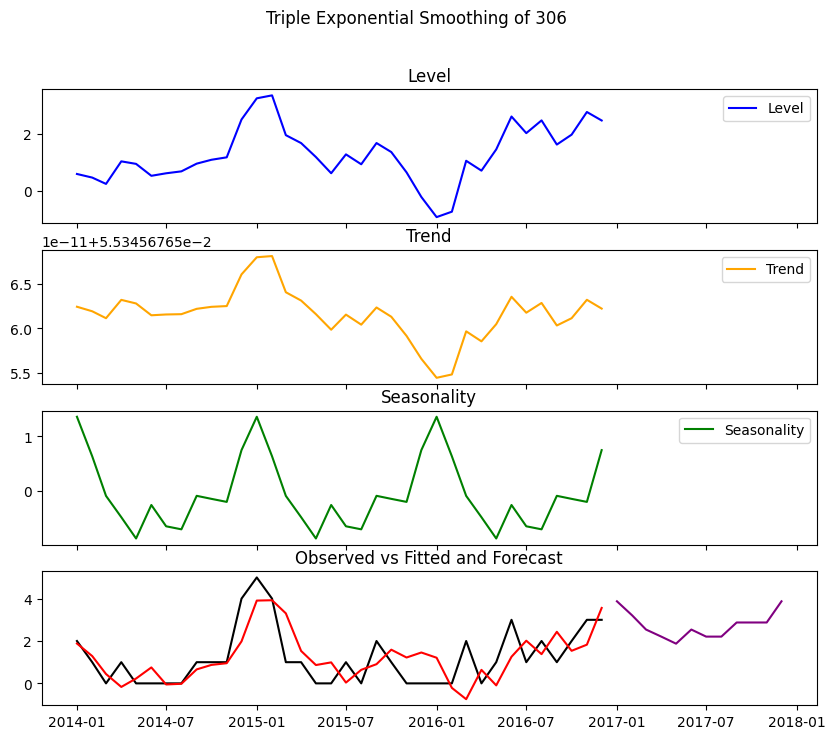

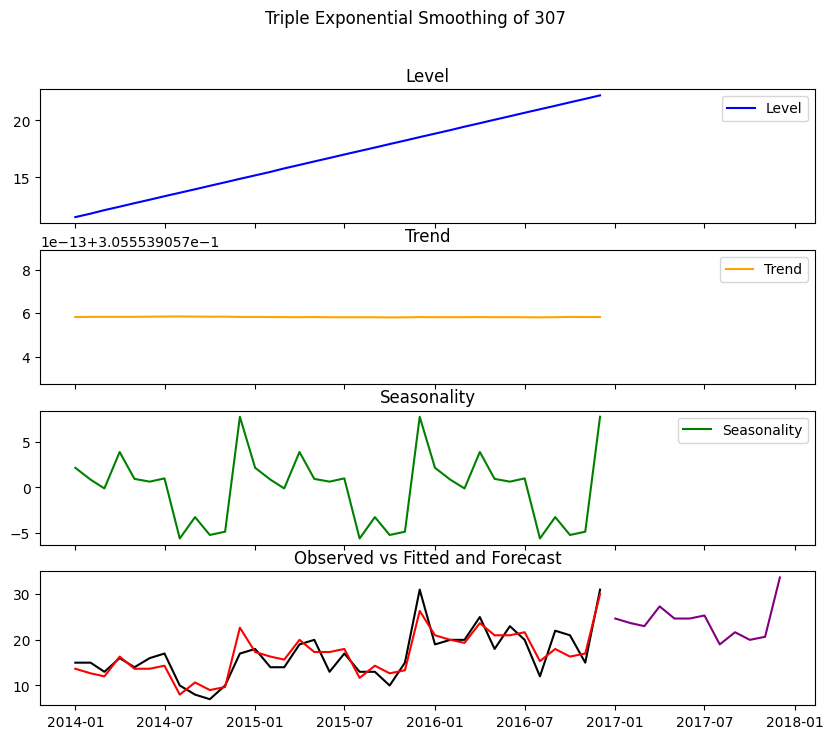

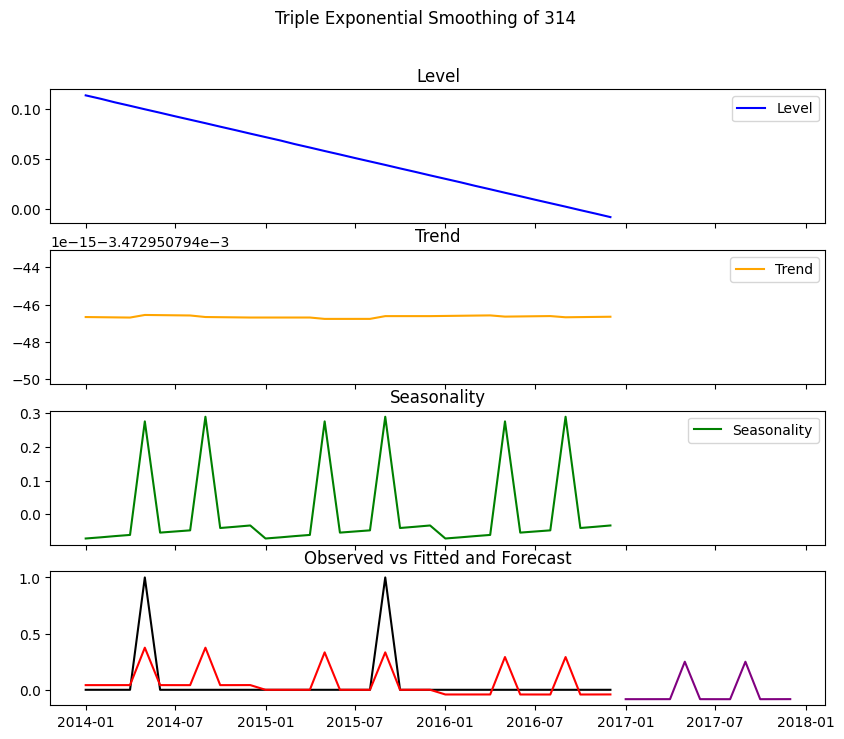

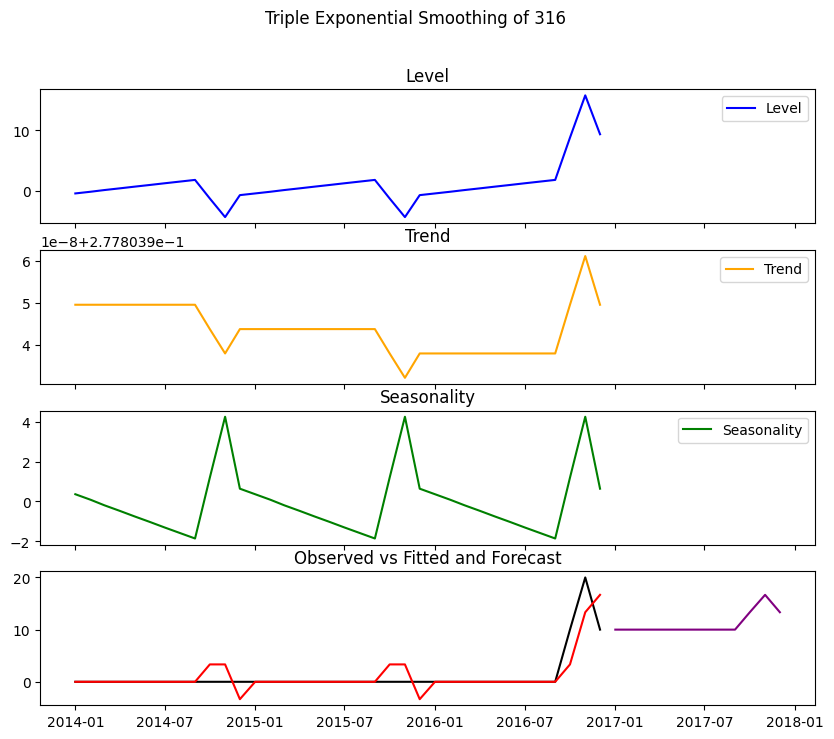

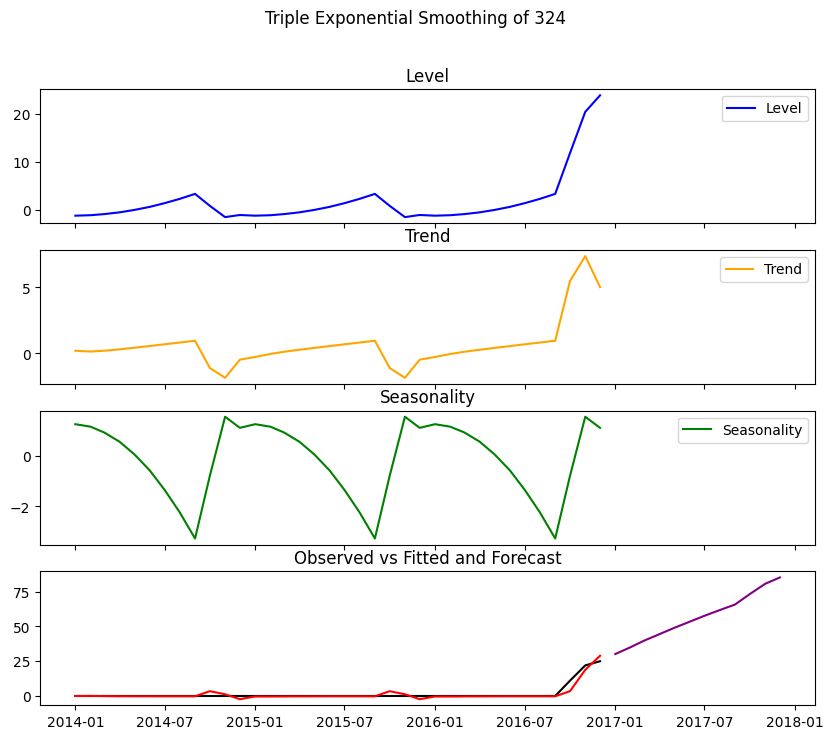

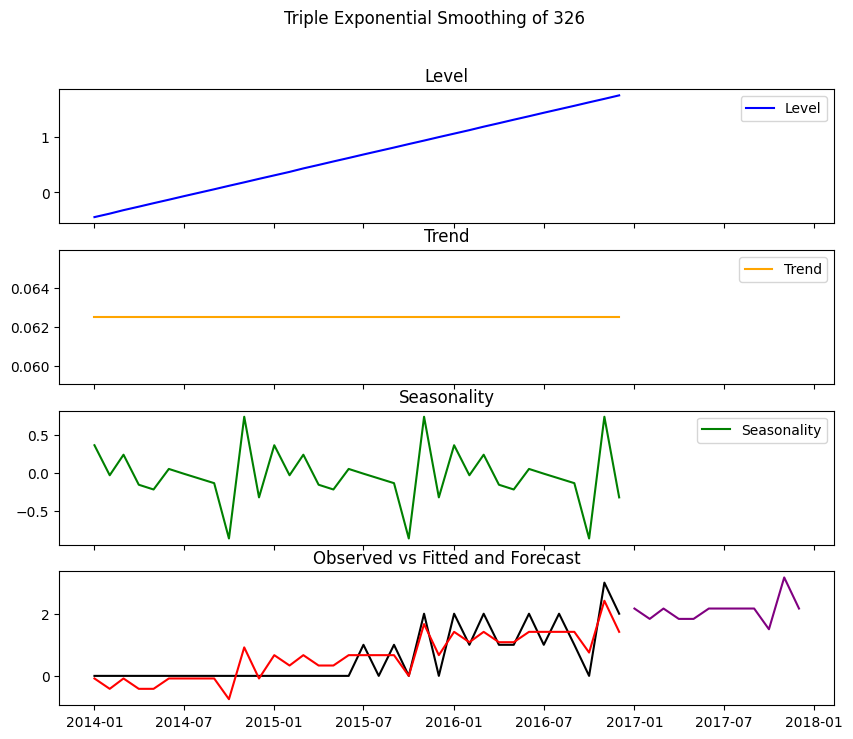

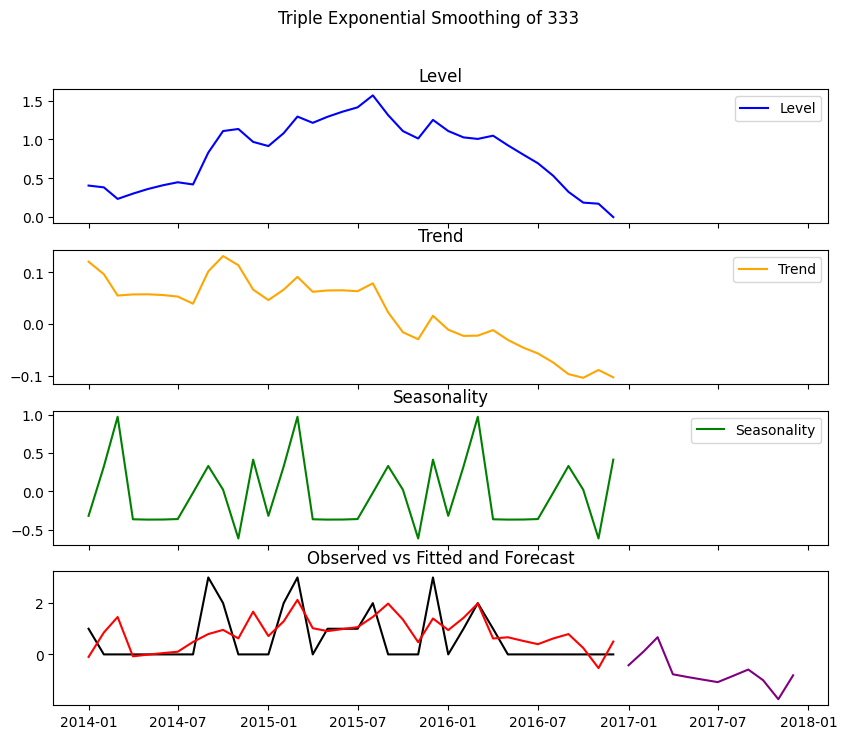

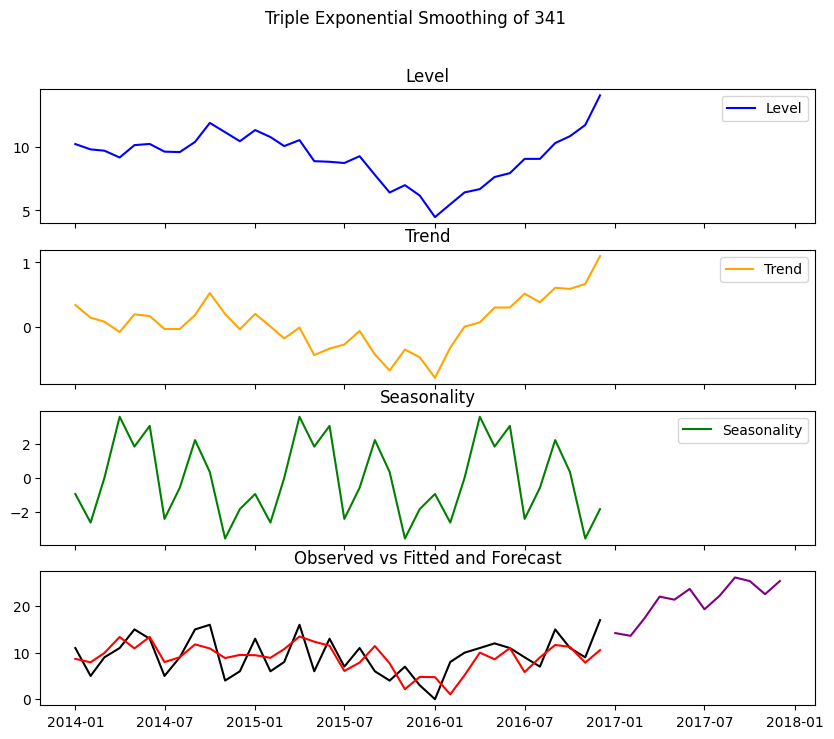

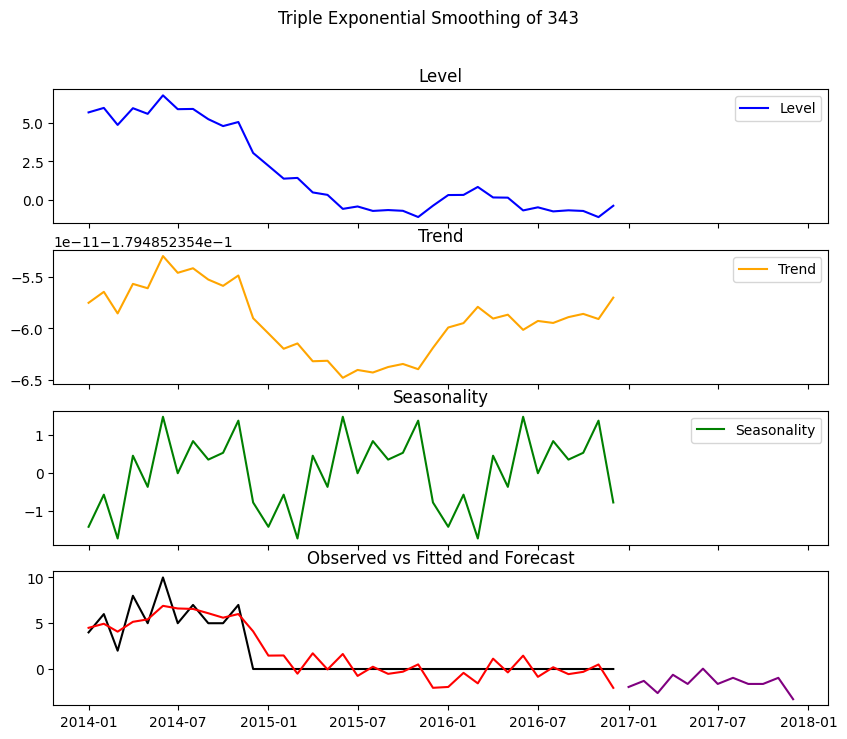

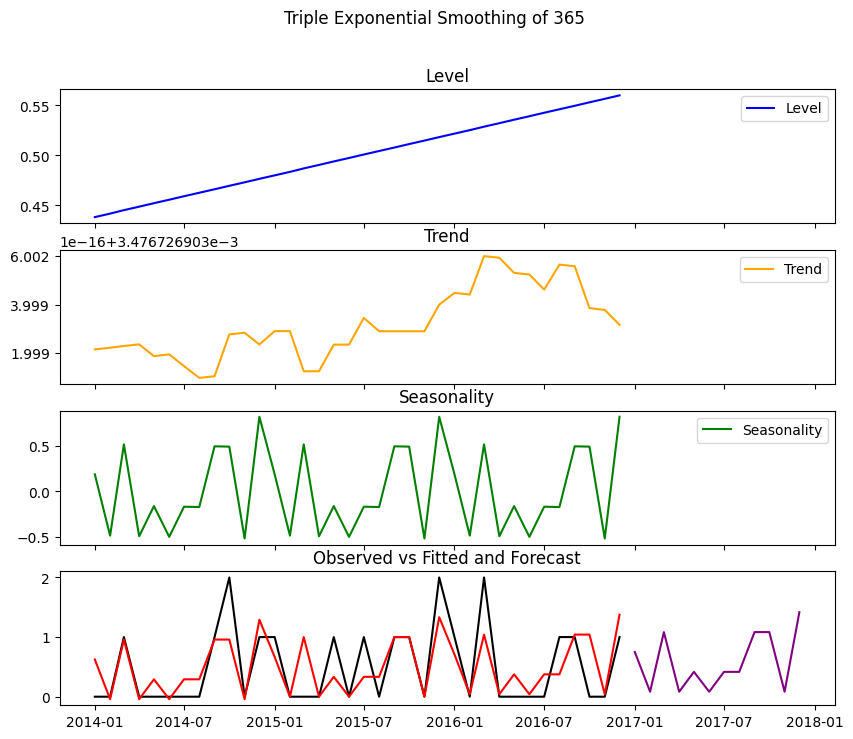

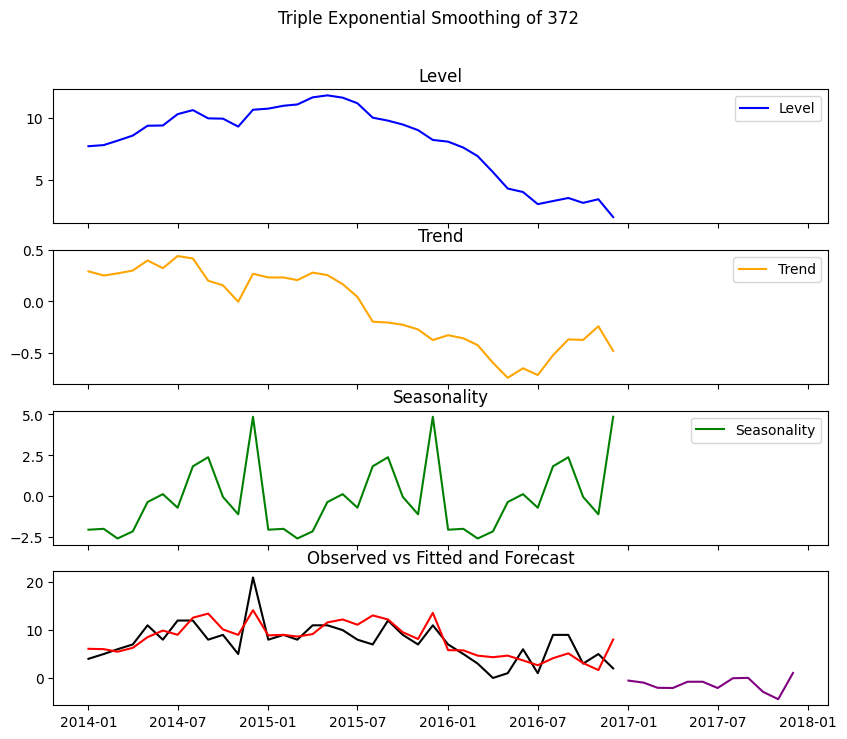

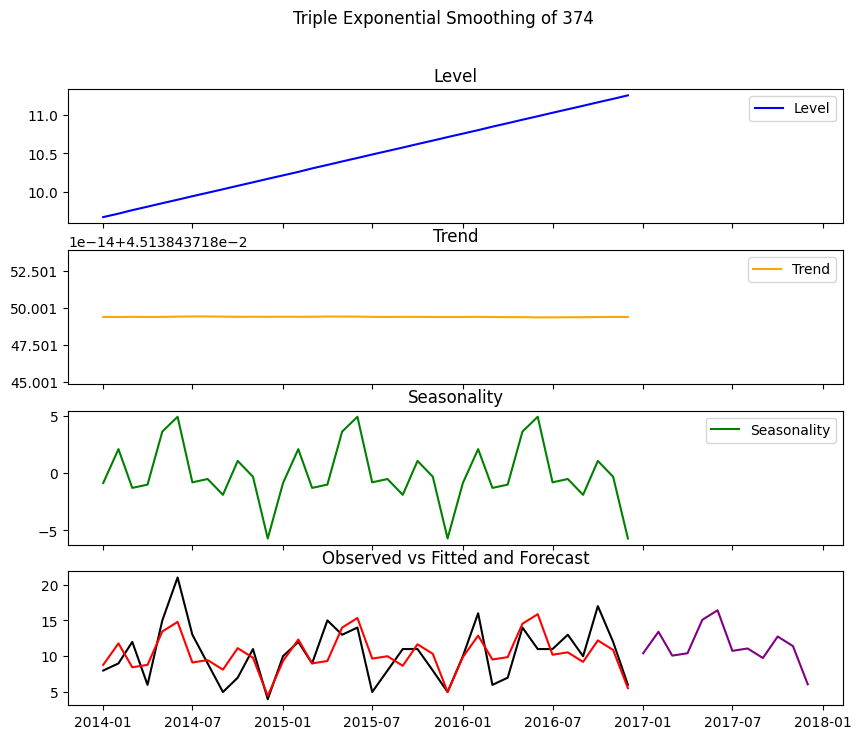

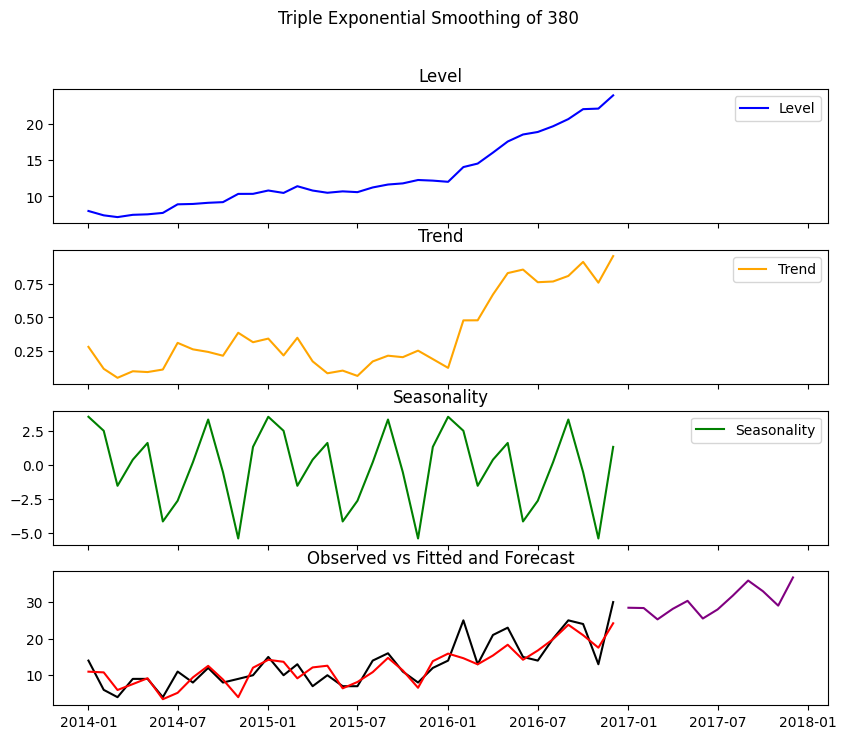

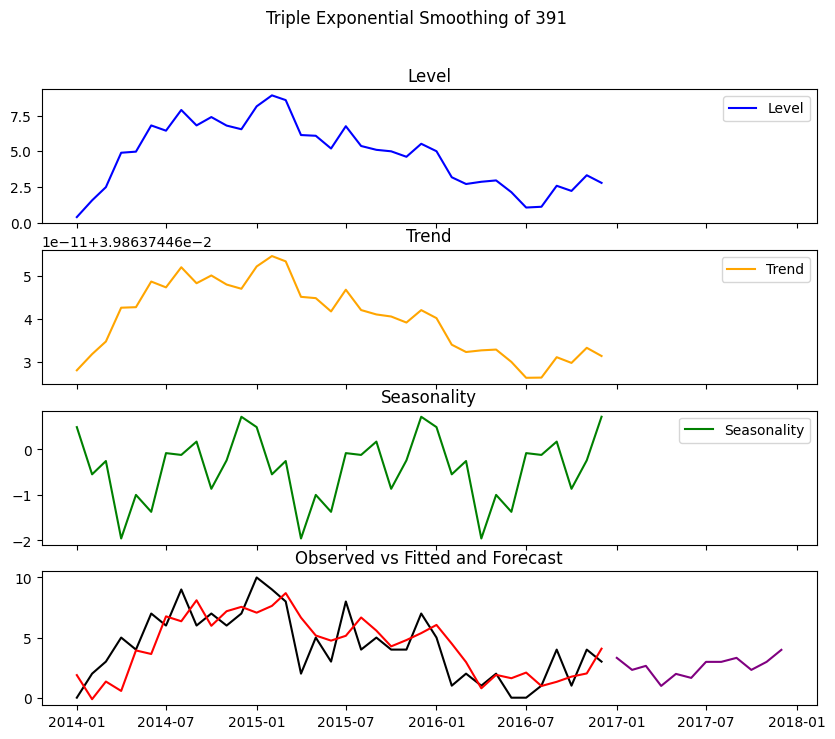

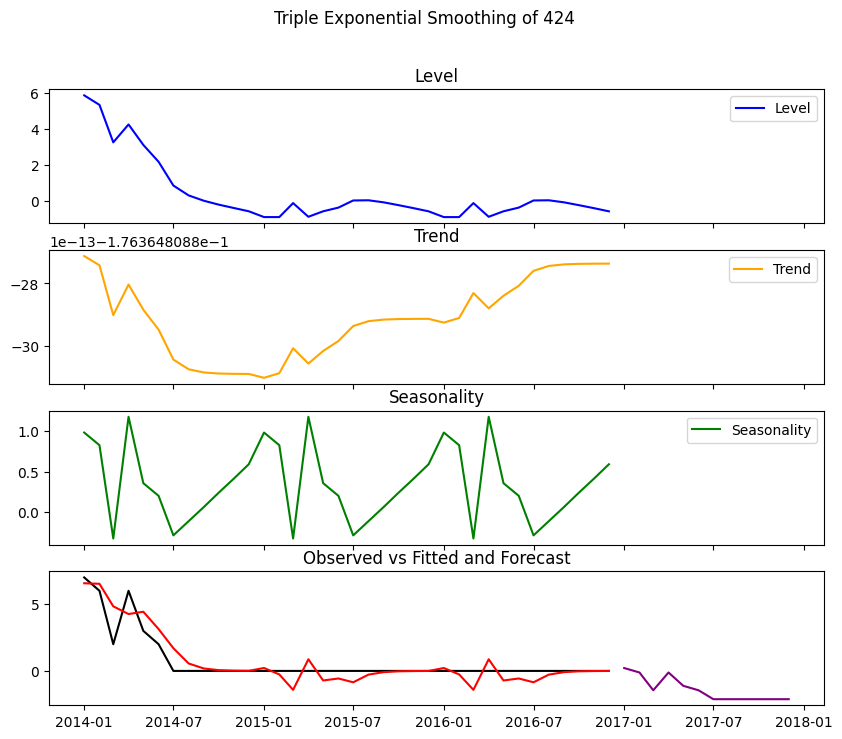

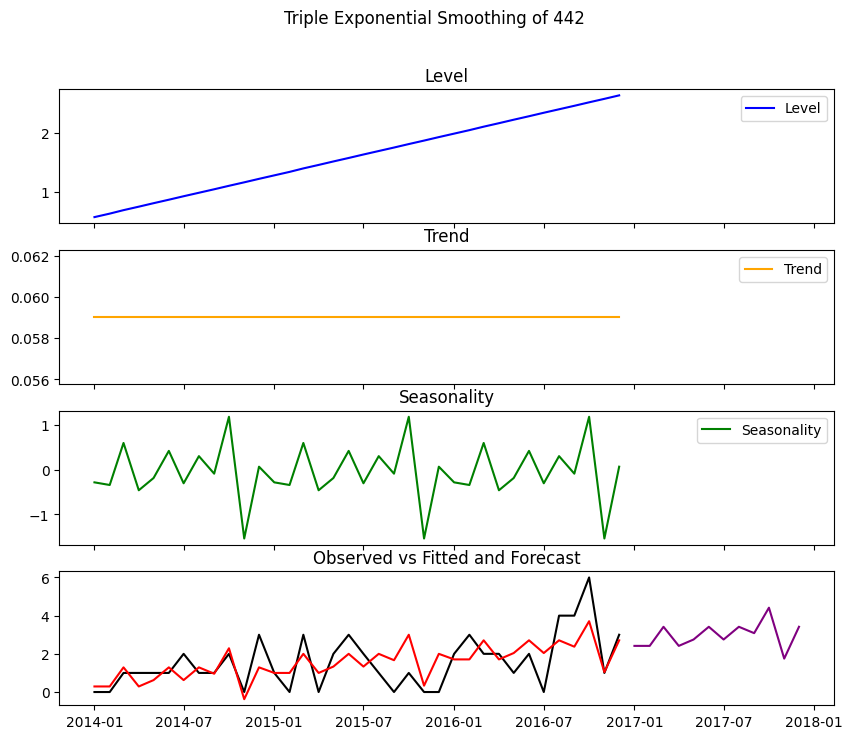

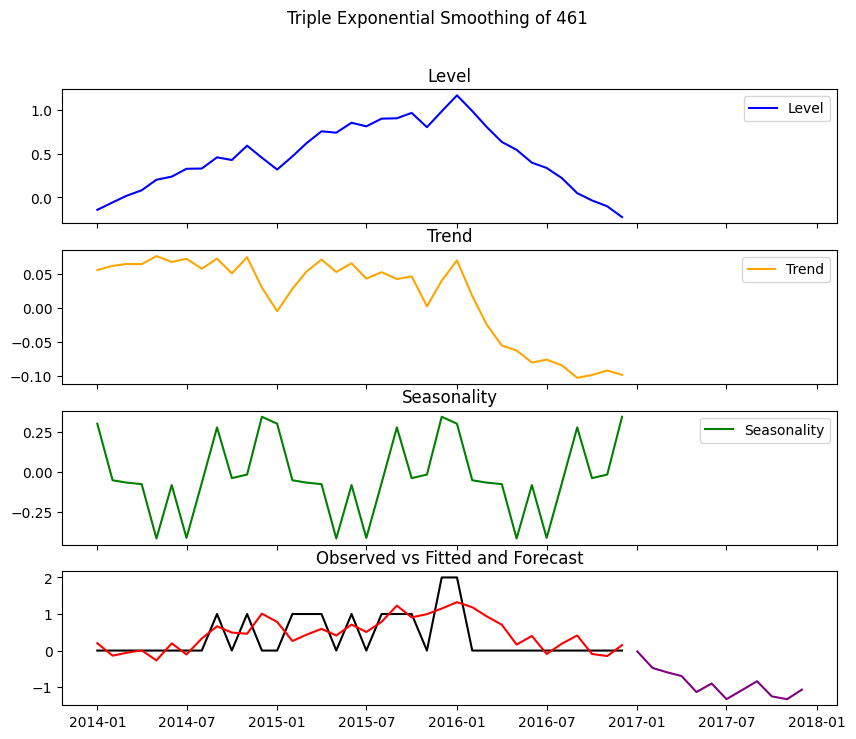

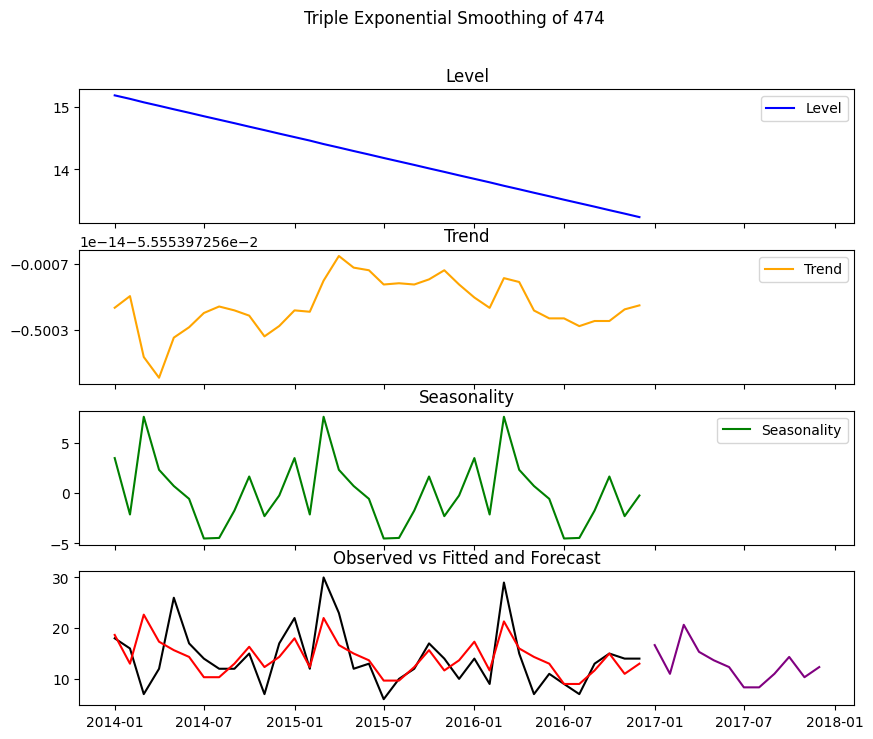

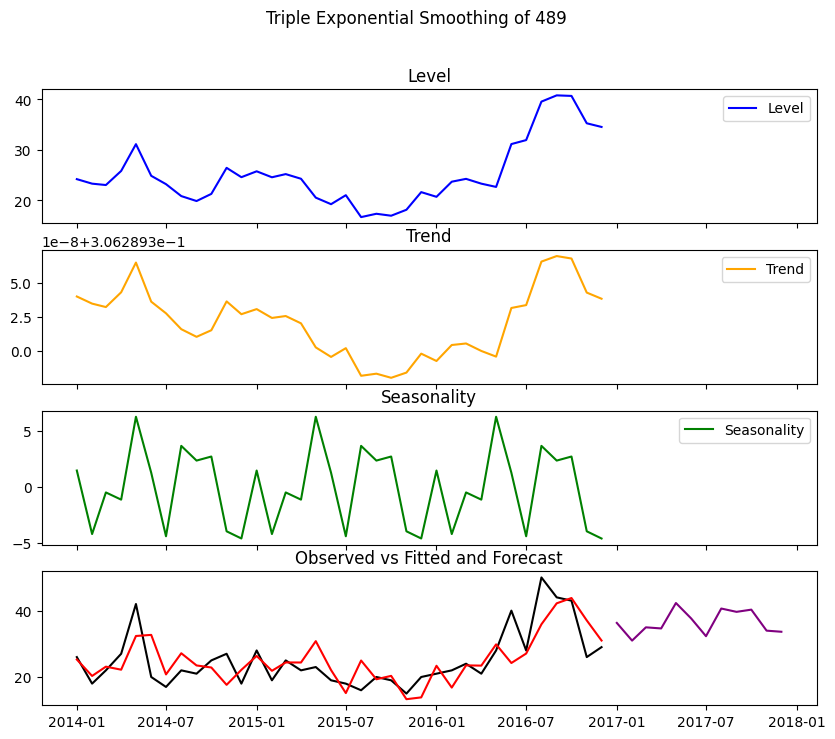

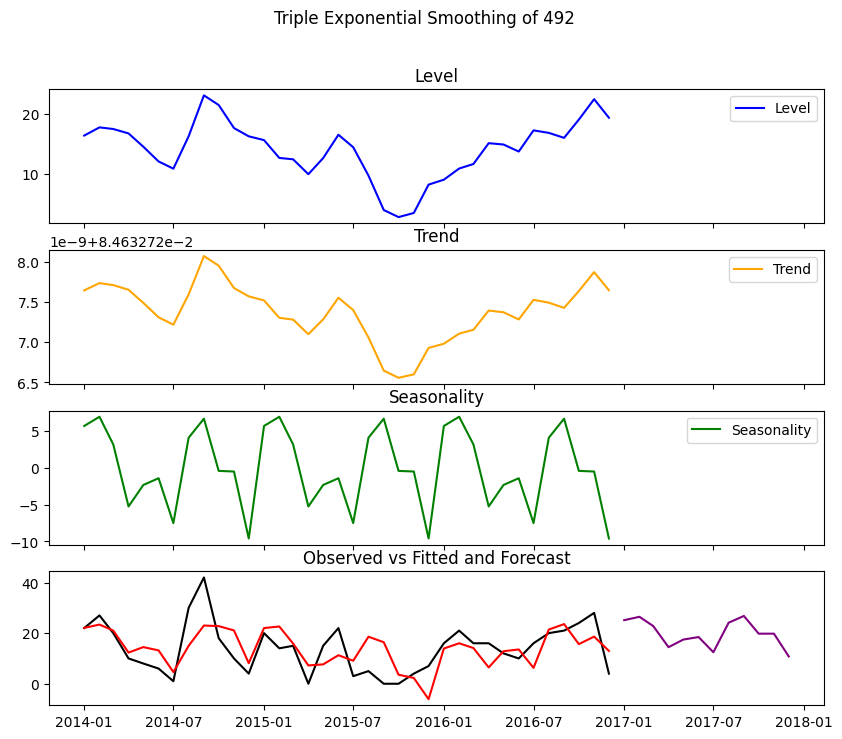

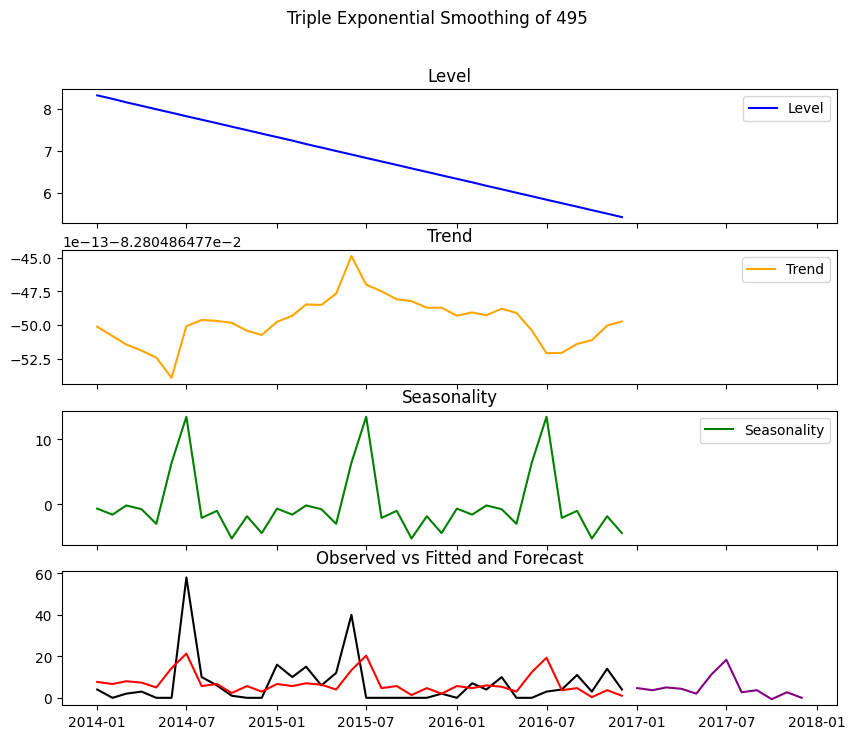

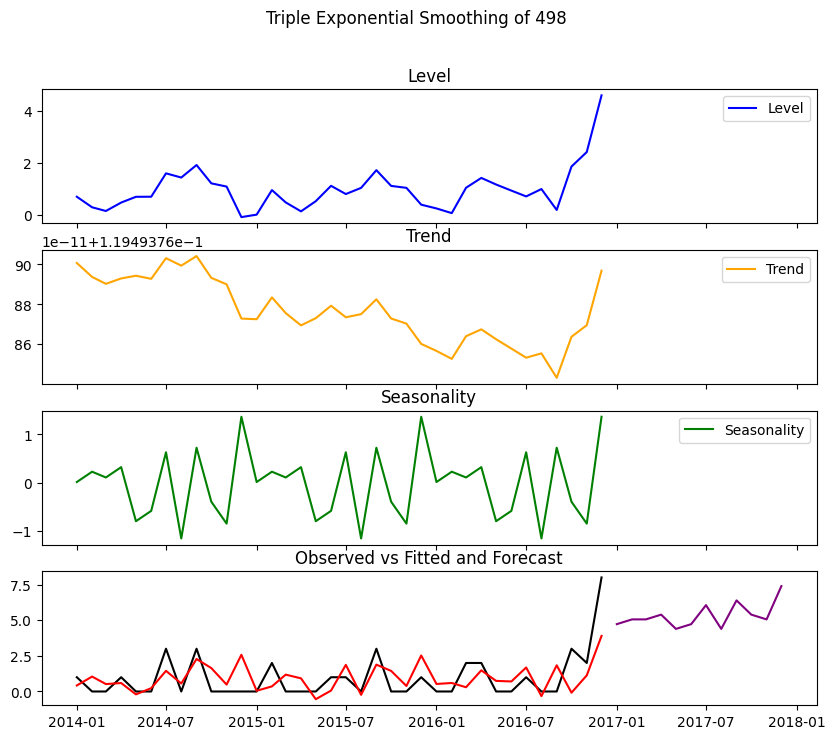

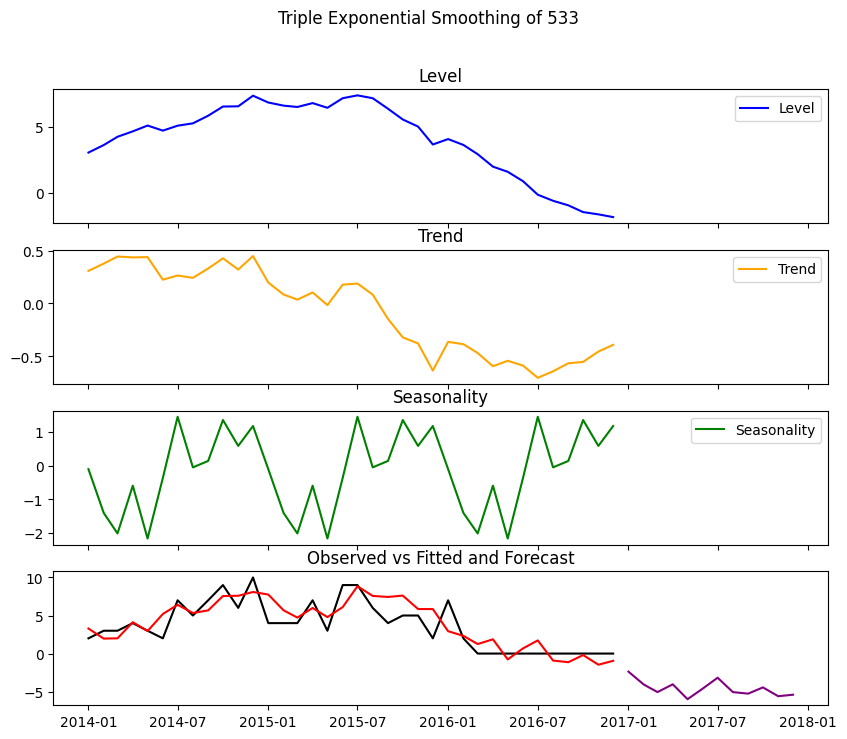

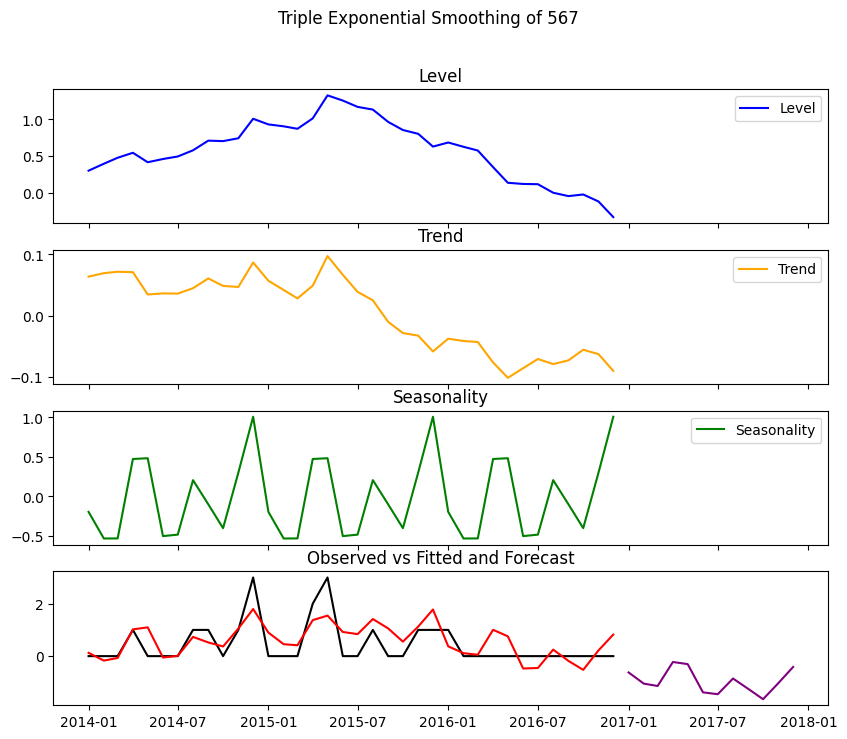

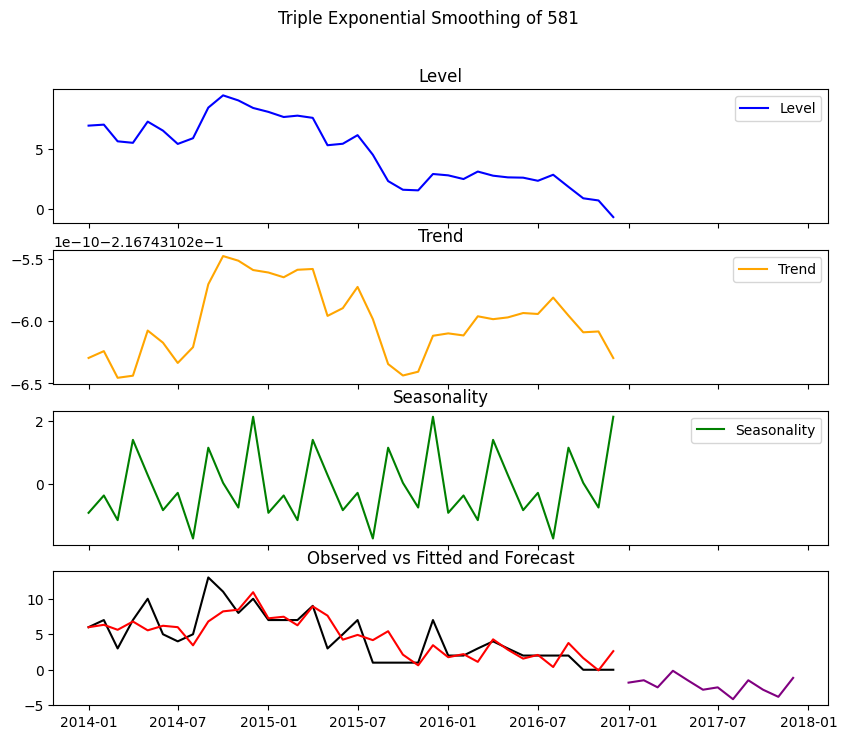

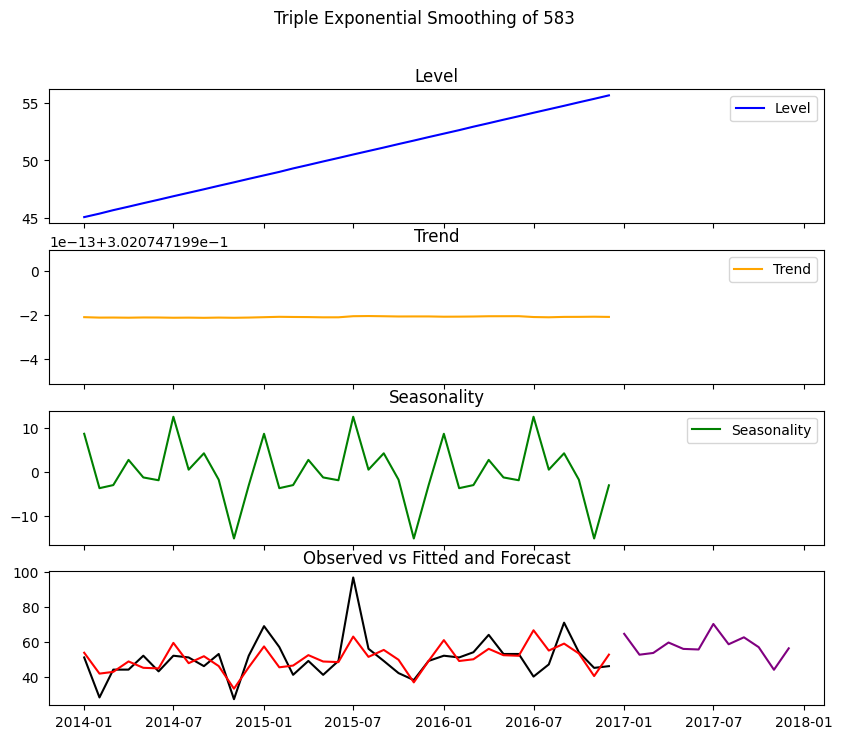

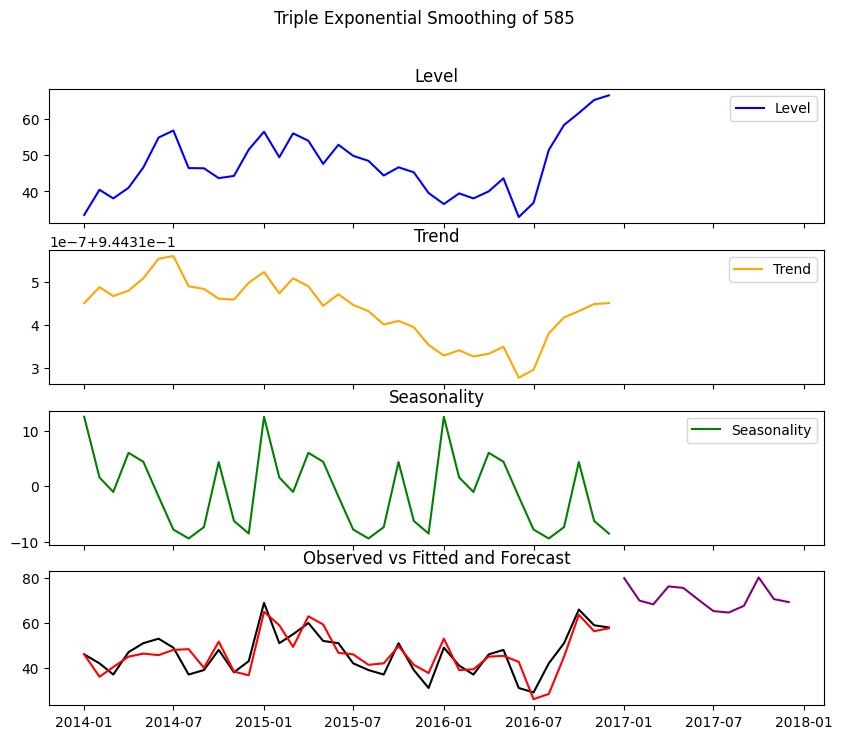

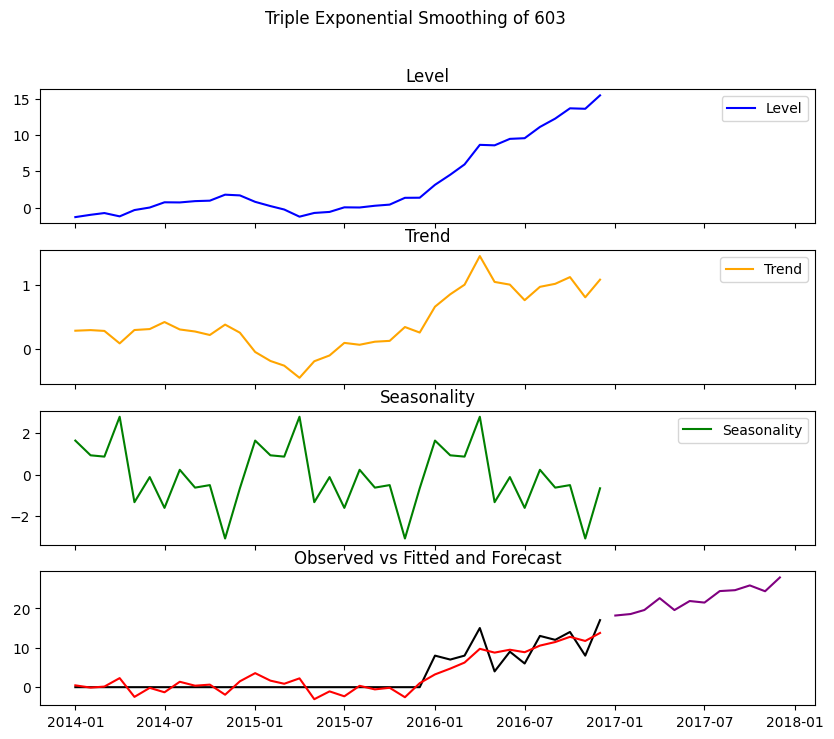

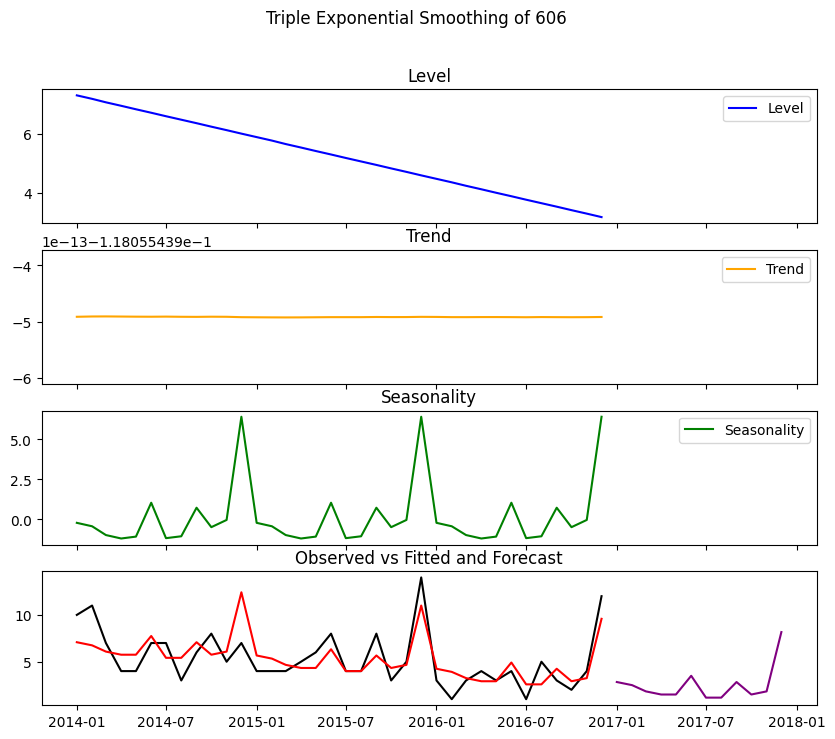

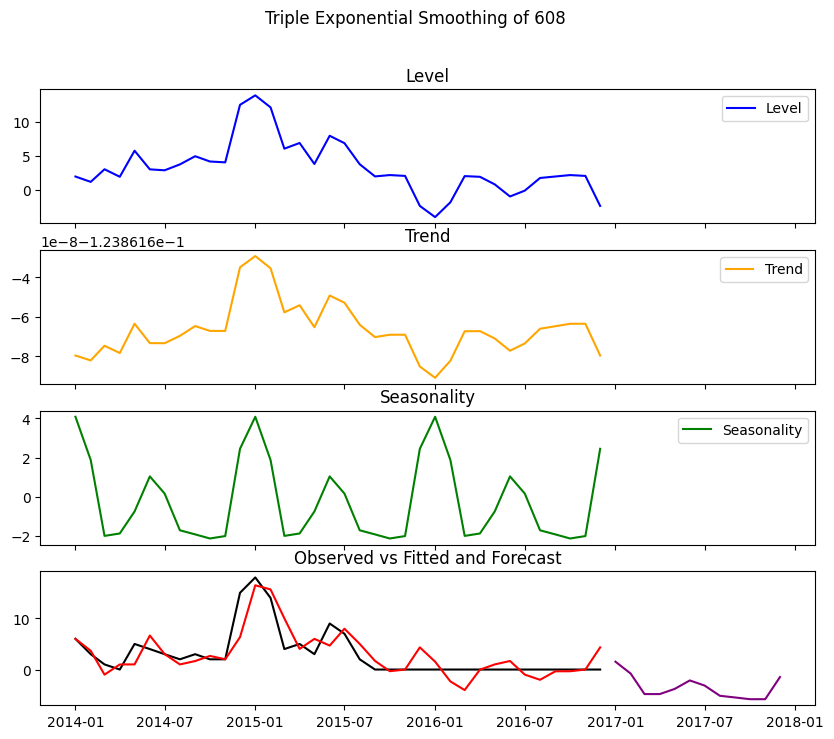

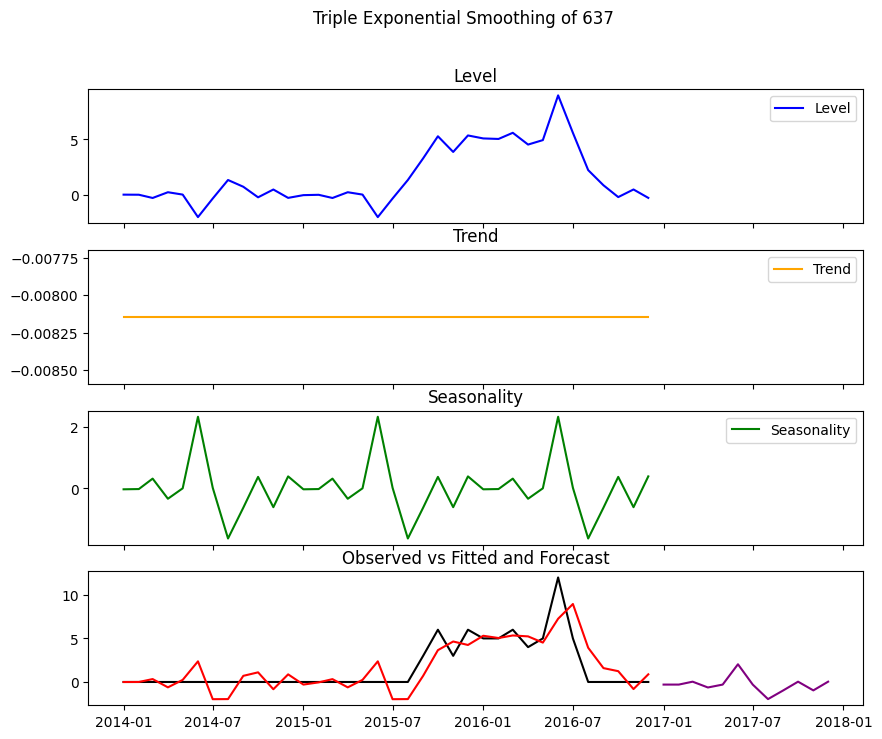

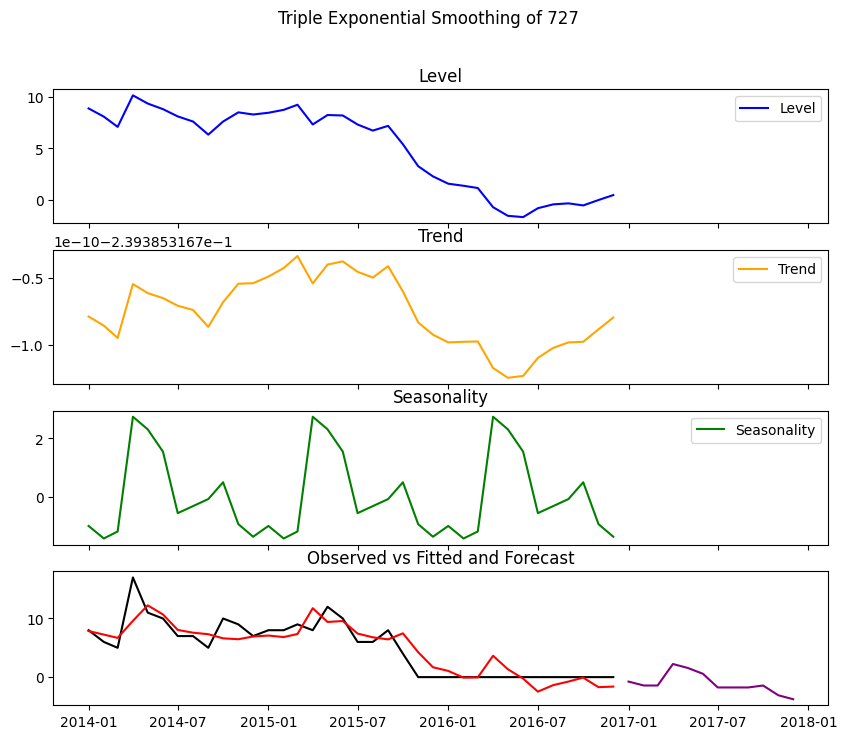

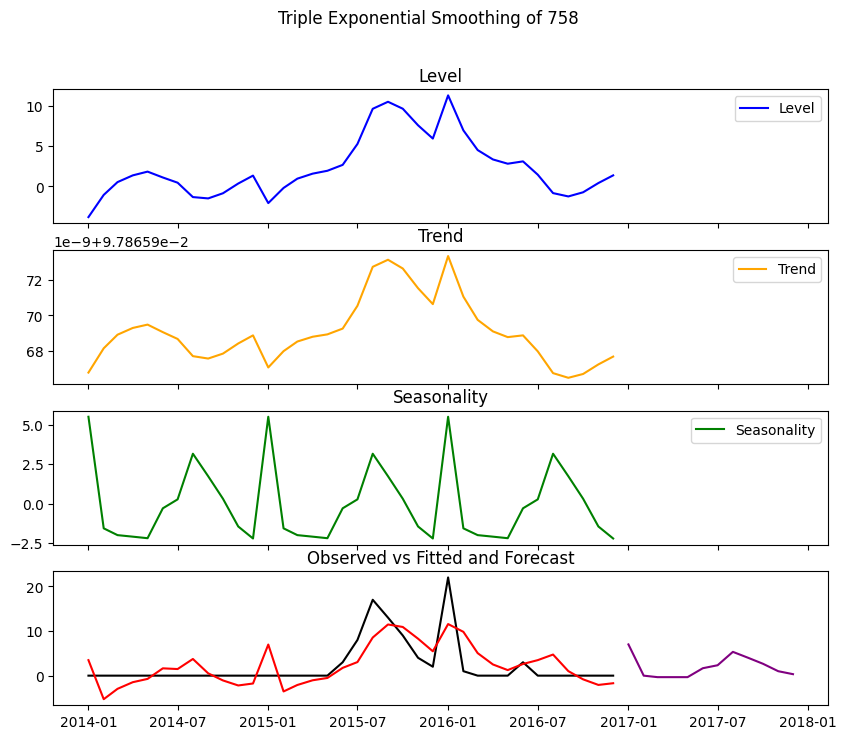

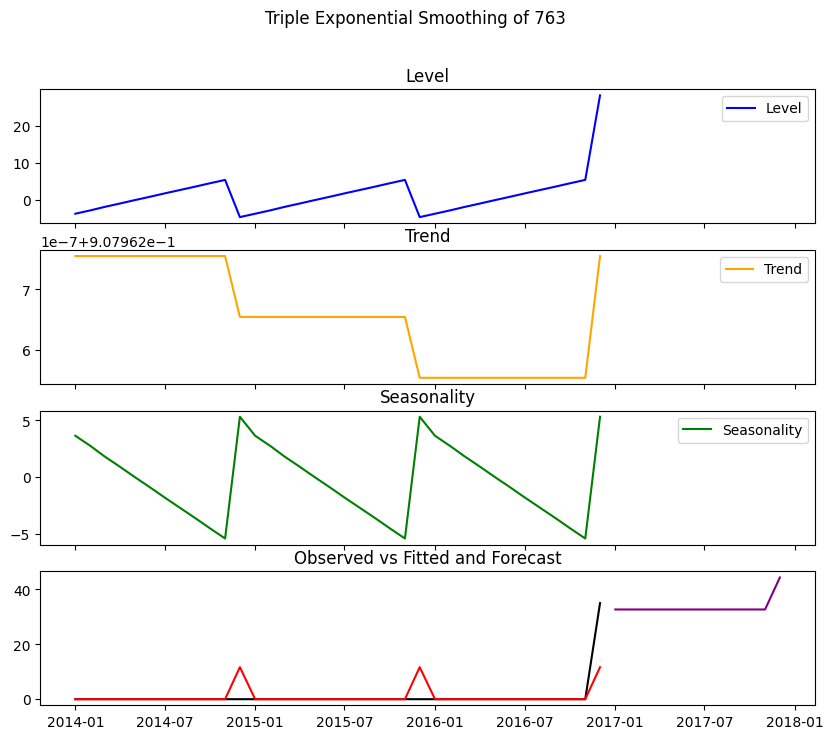

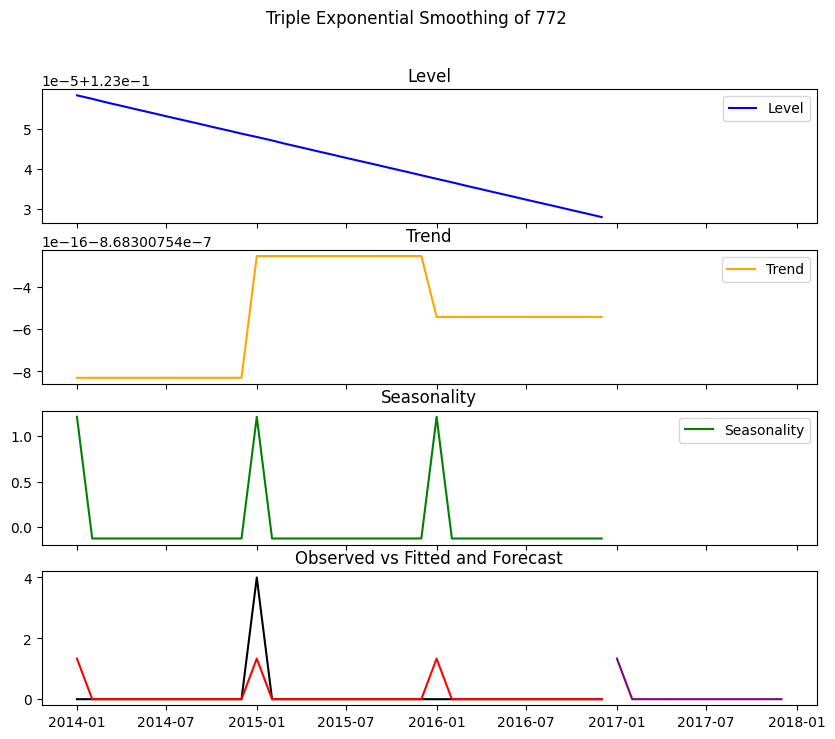

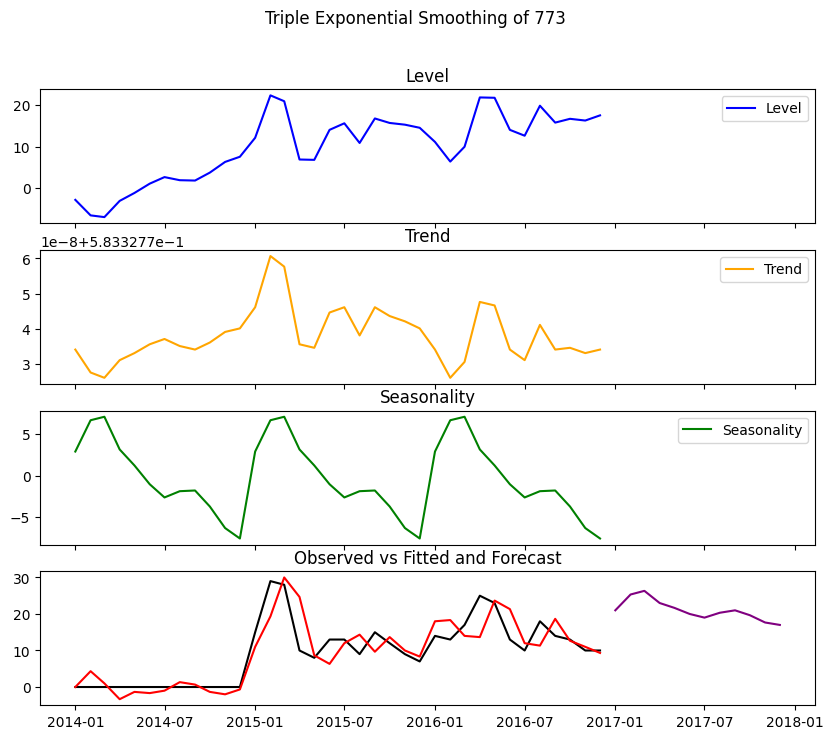

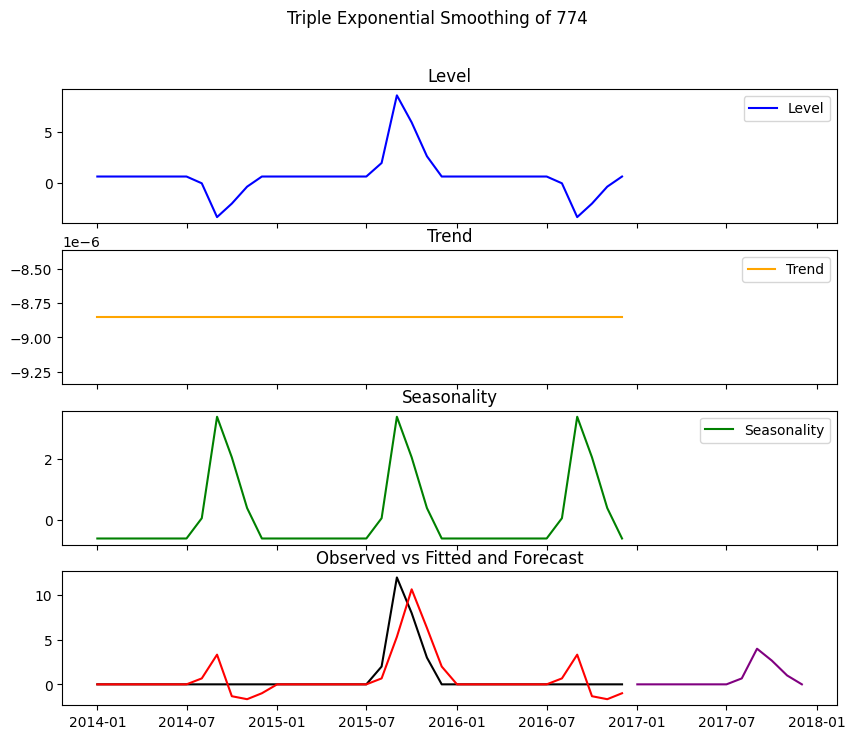

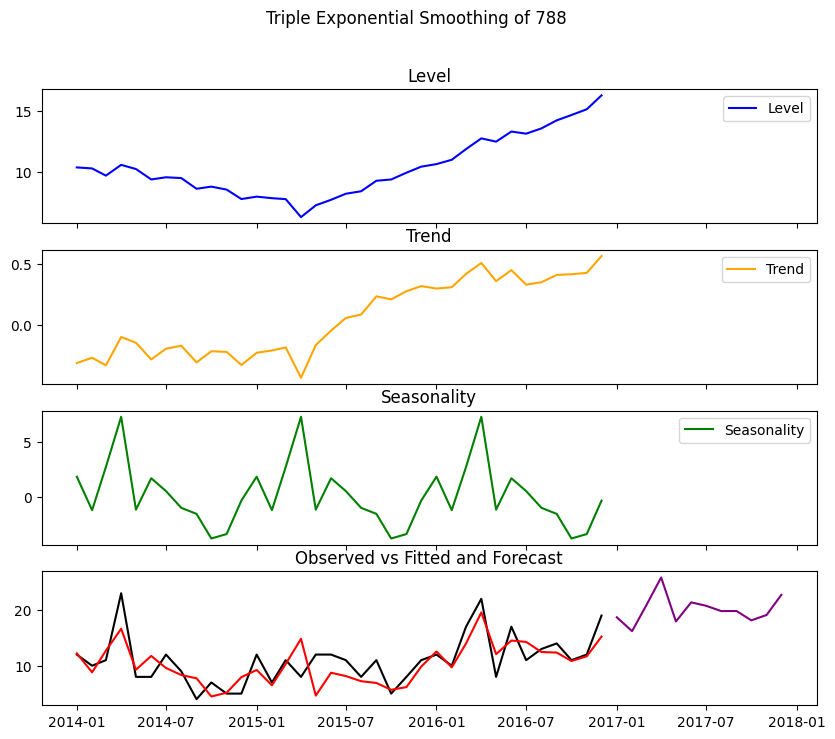

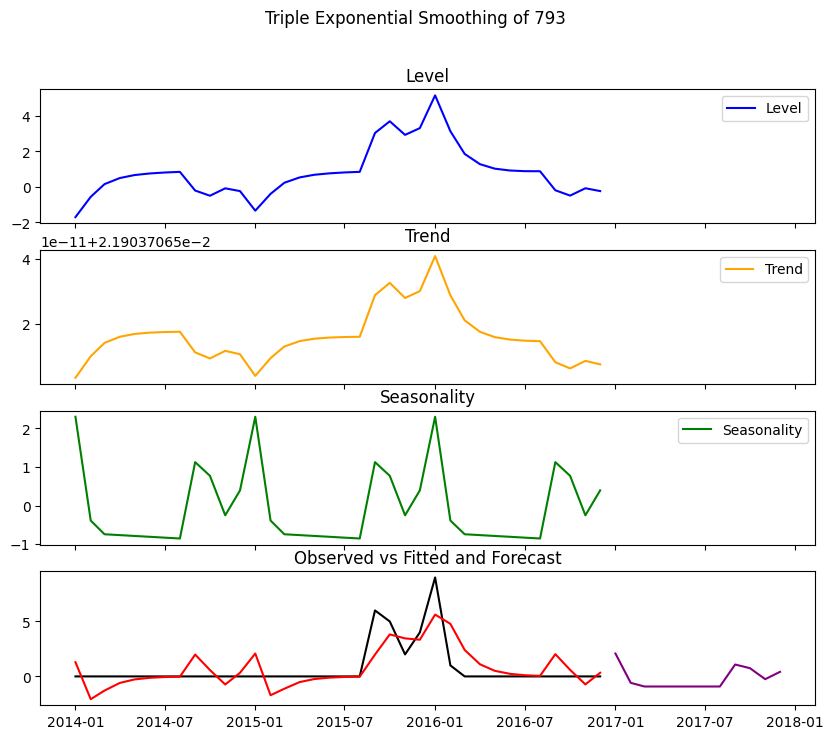

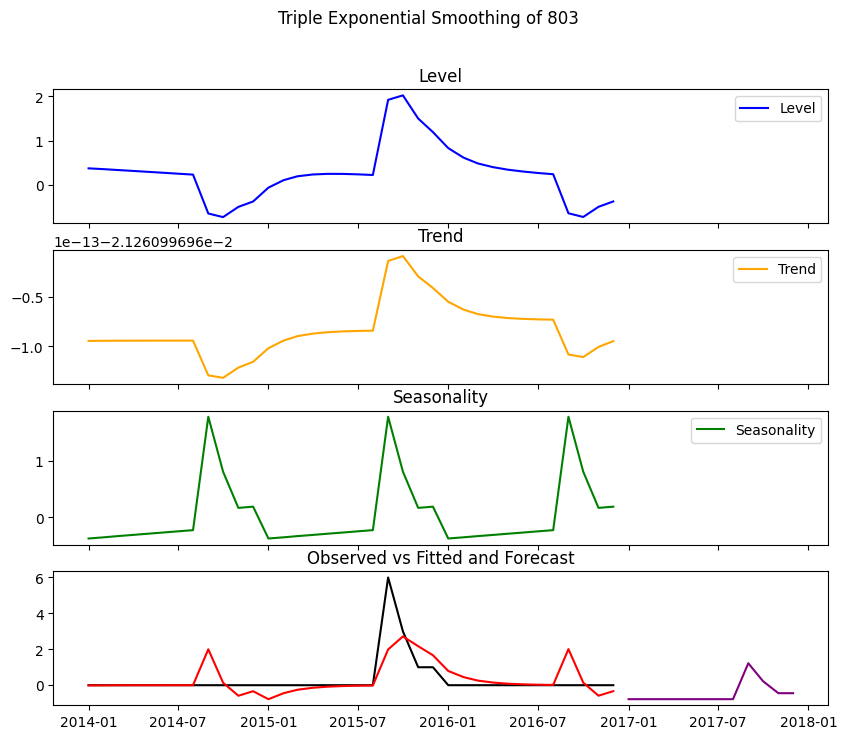

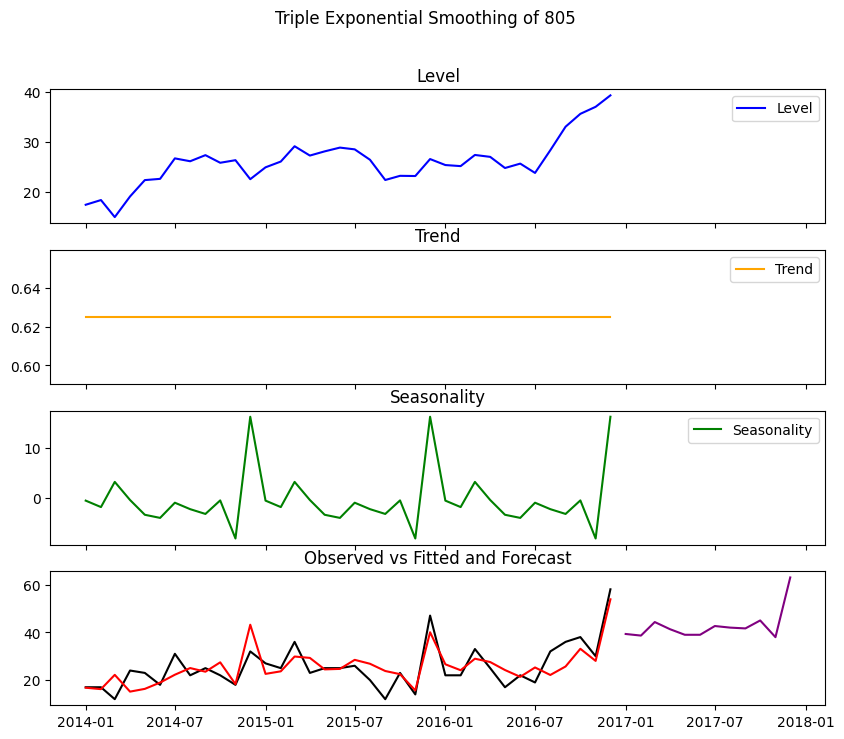

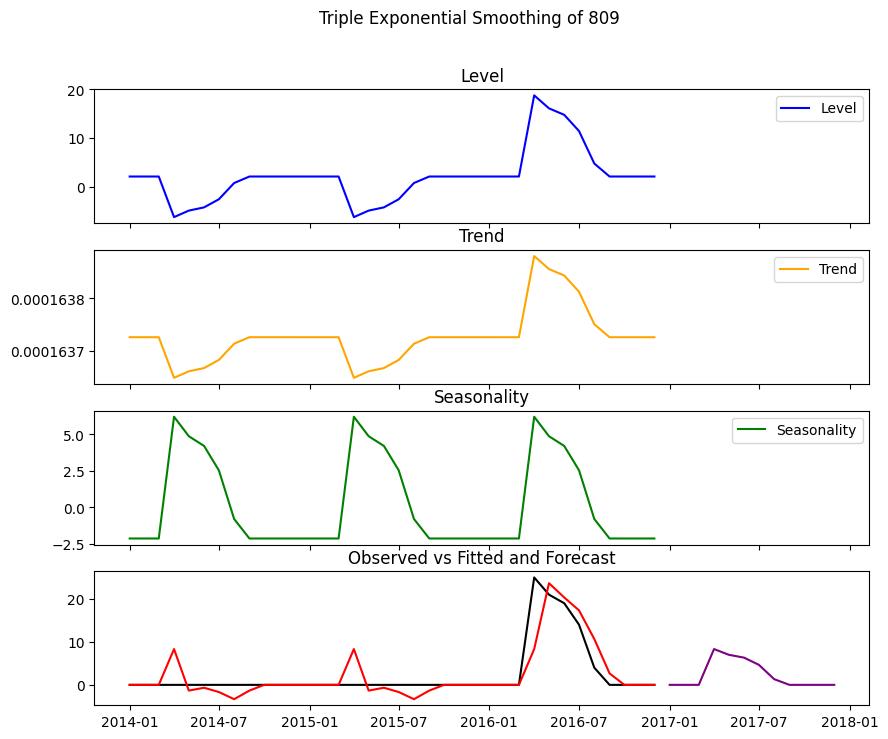

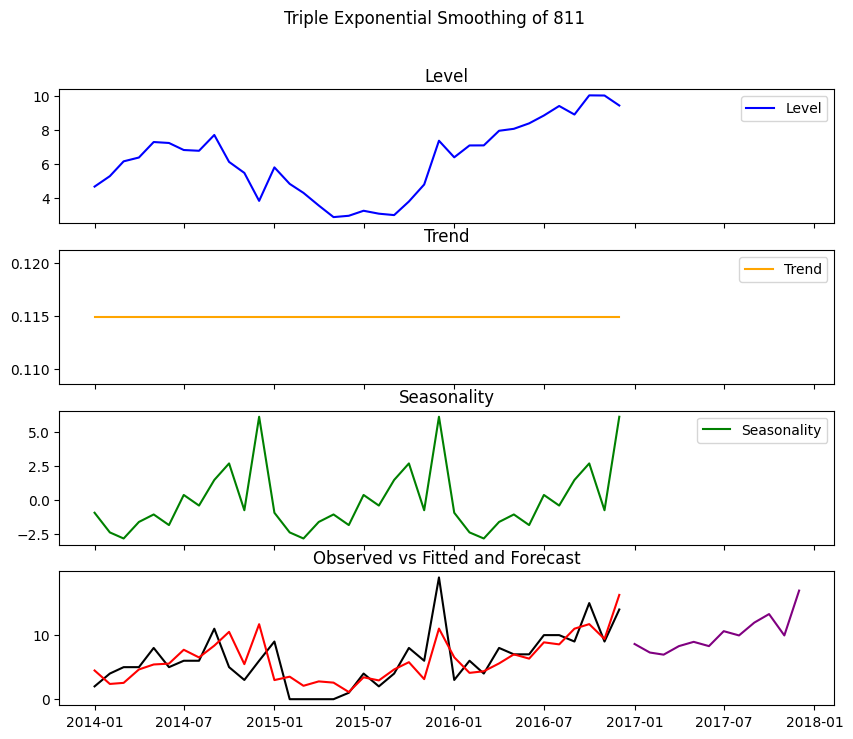

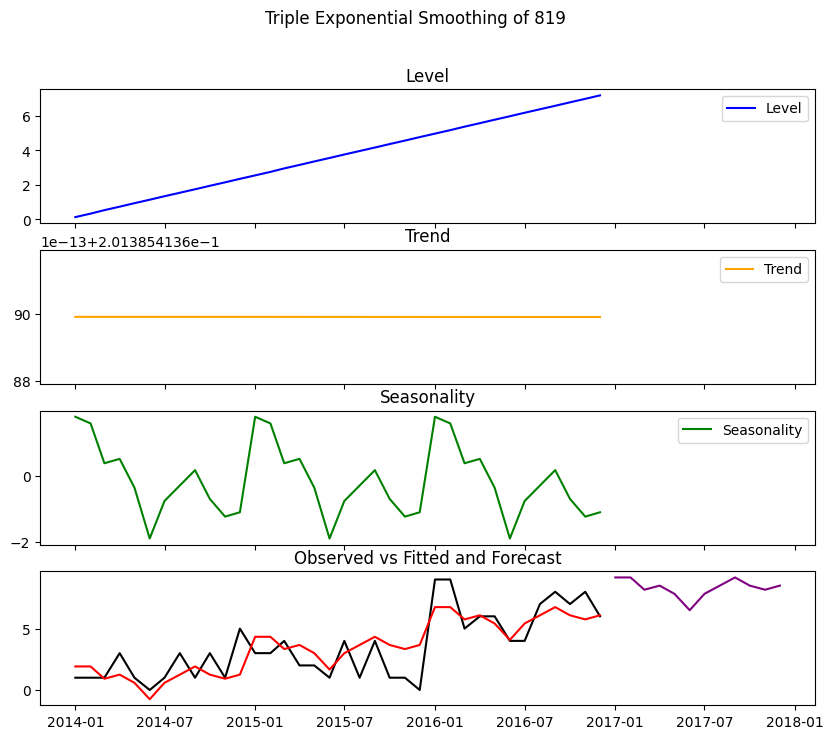

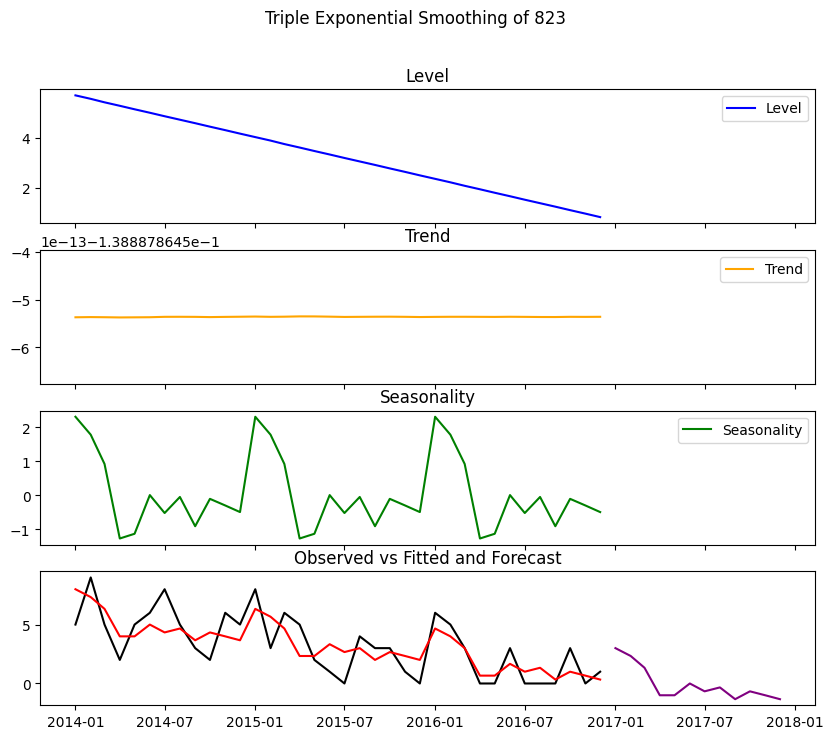

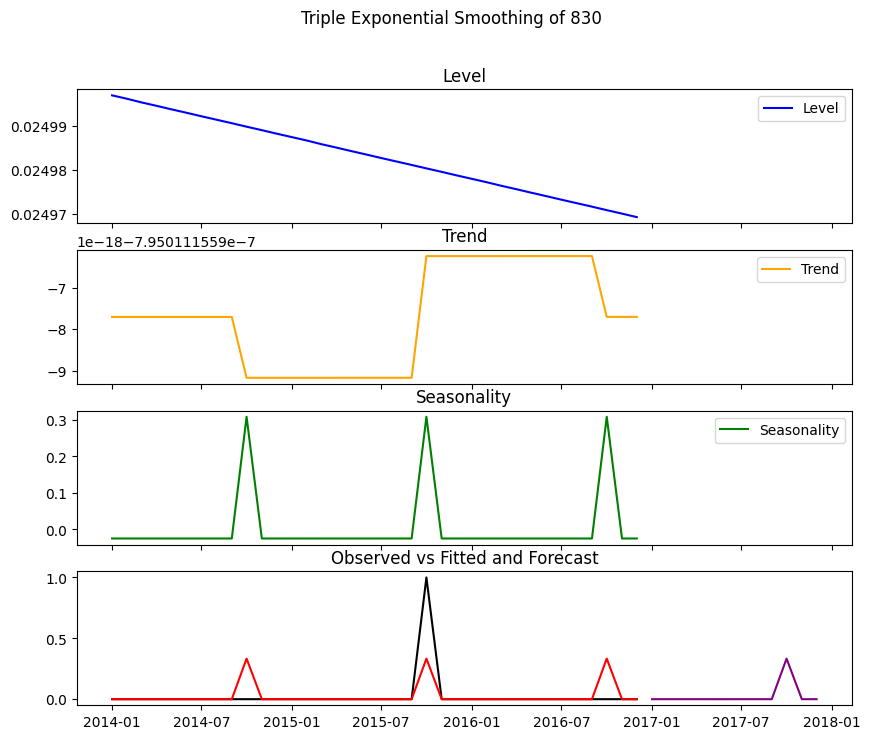

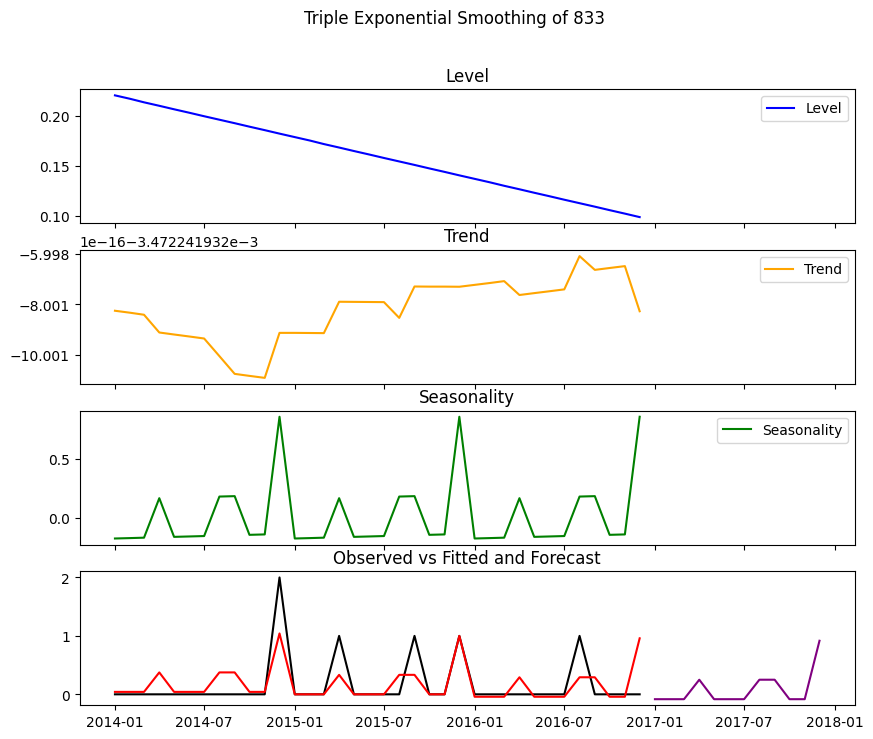

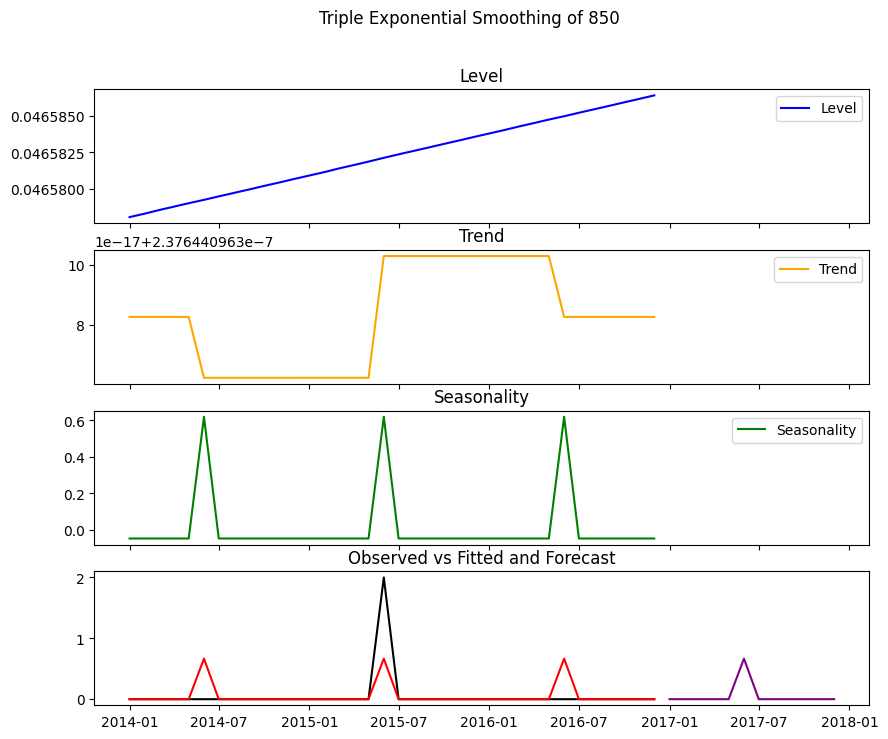

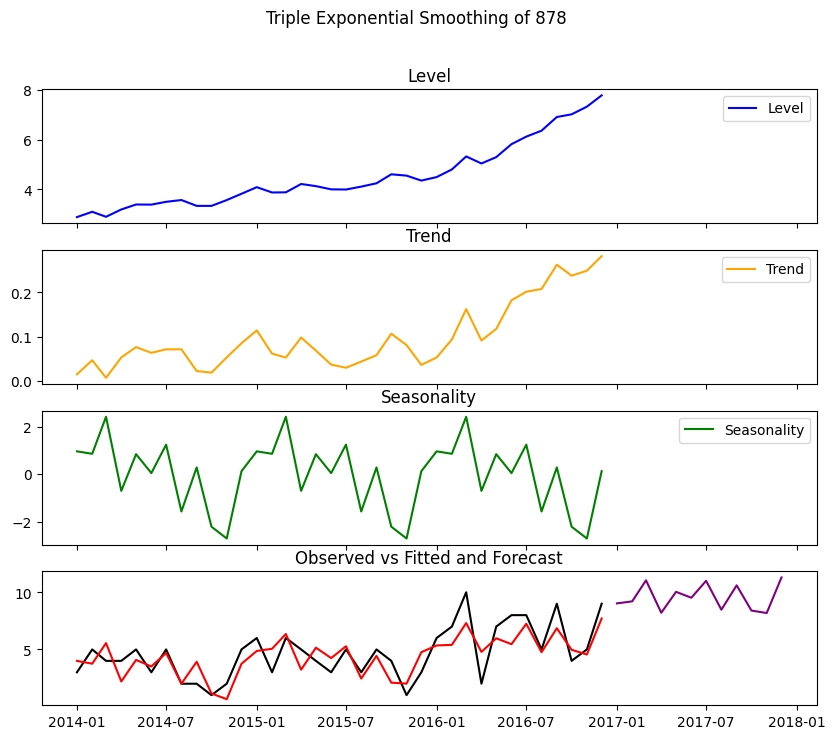

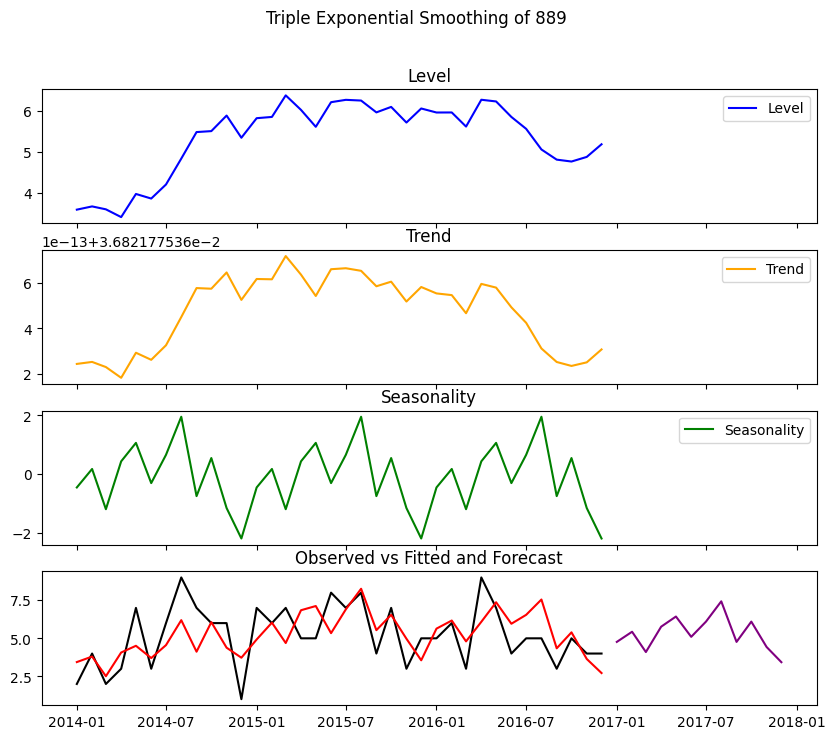

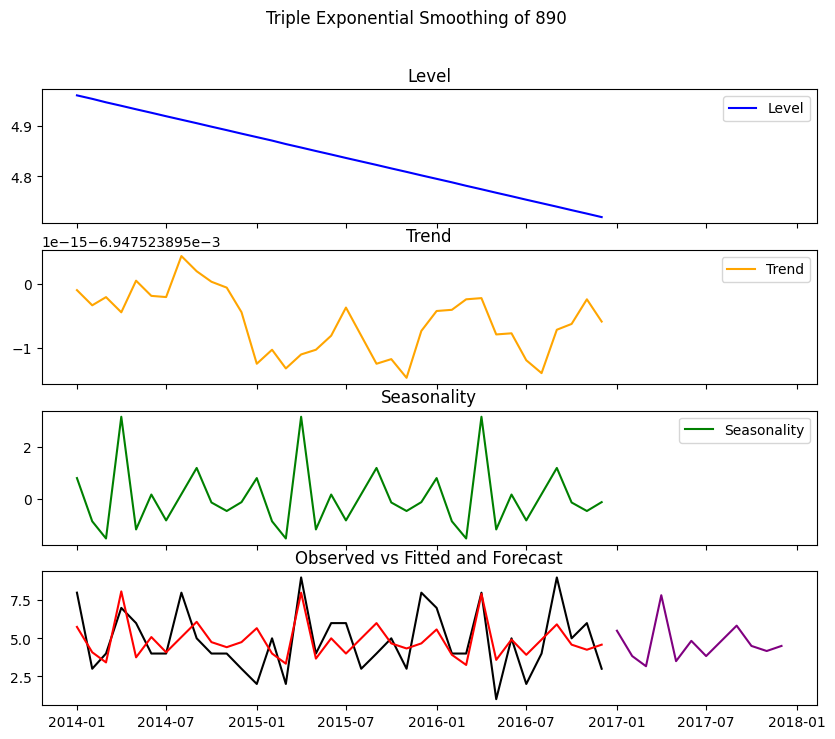

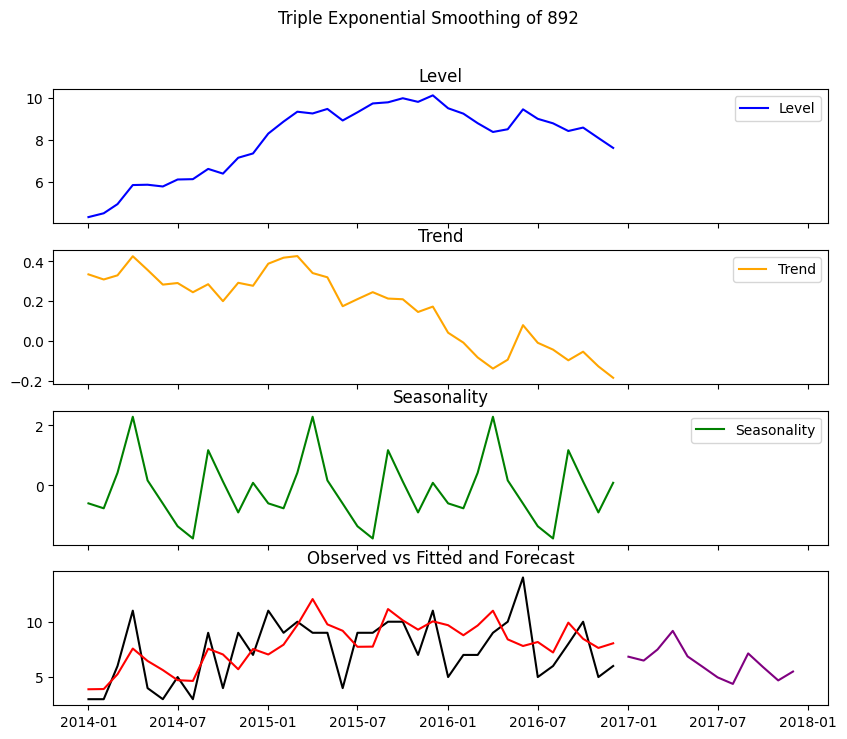

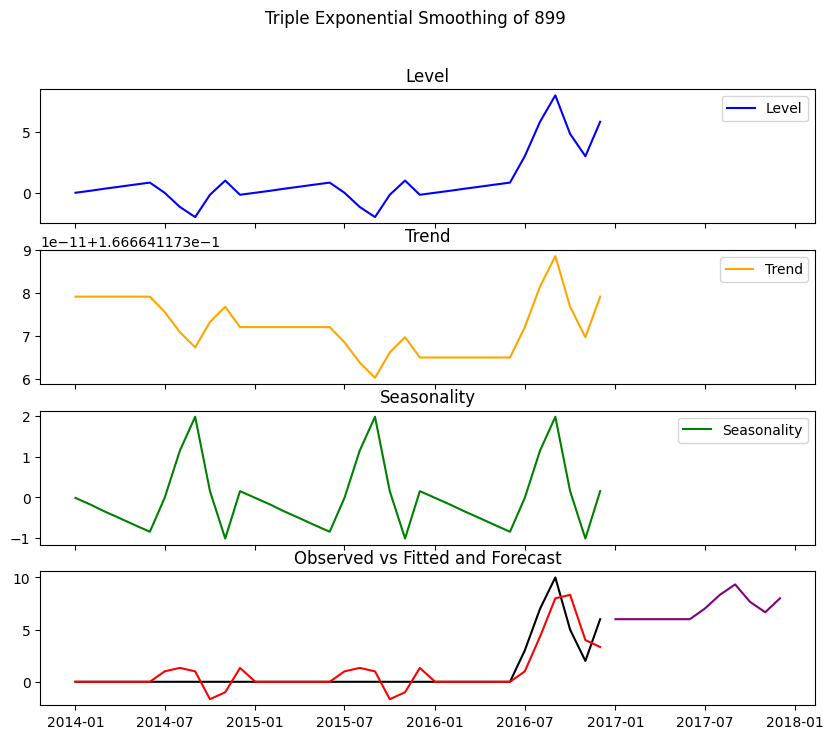

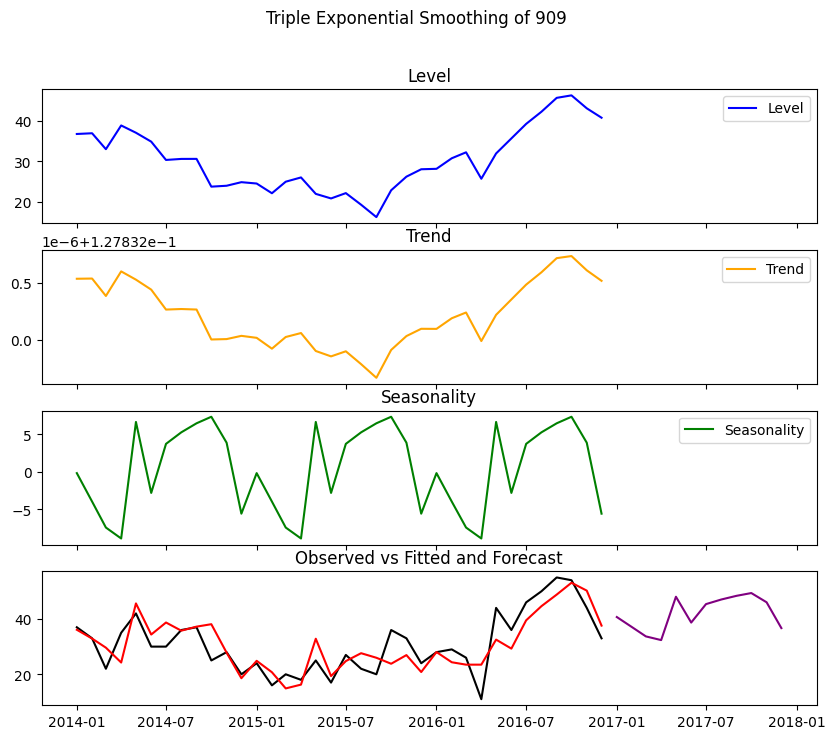

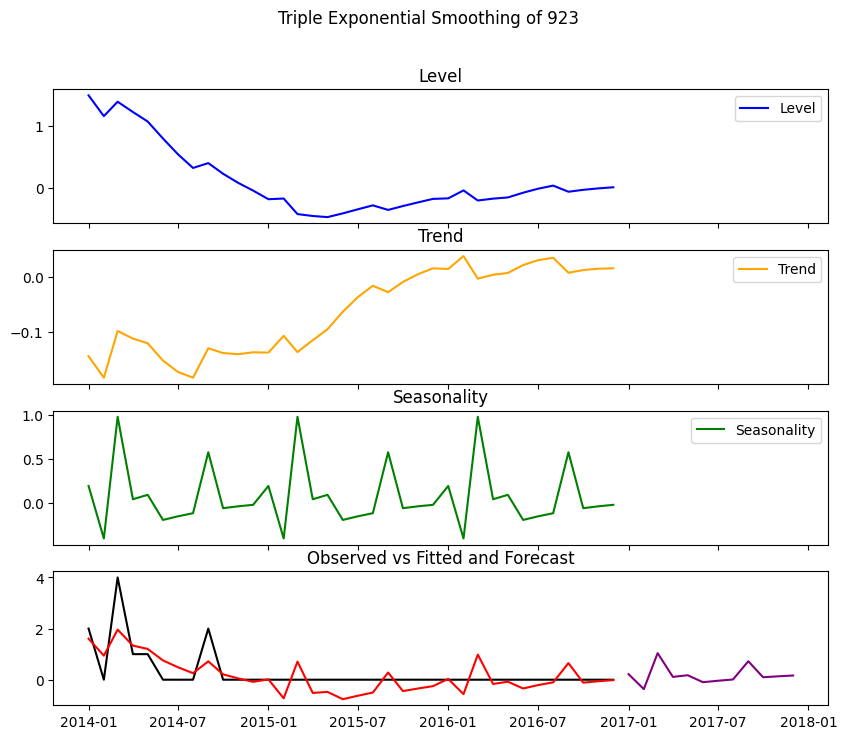

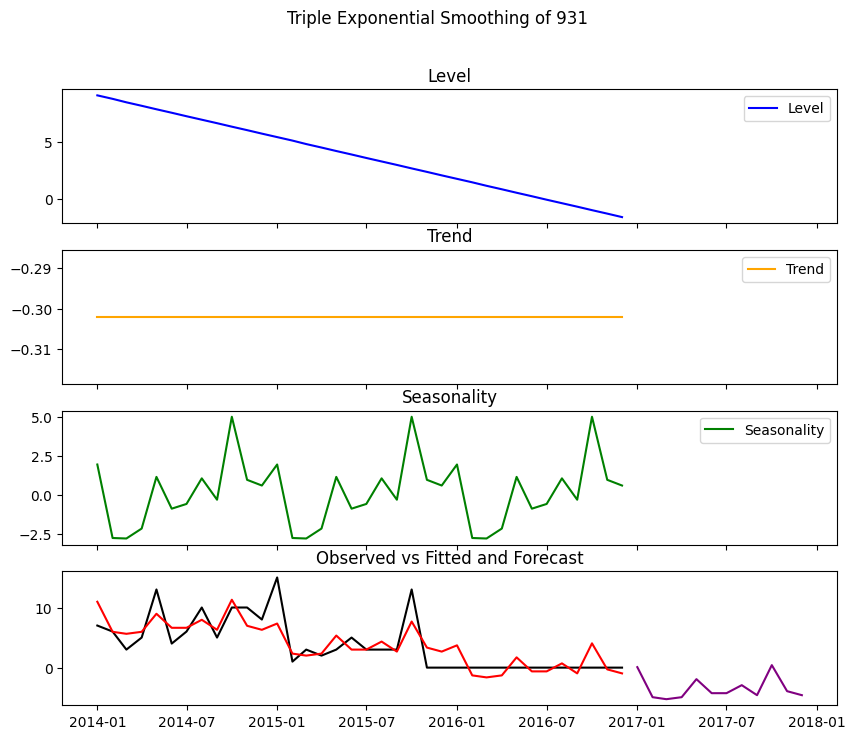

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Agrupar los datos por 'Producto' y 'Fecha' para calcular la cantidad por mes
df['Month'] = df['Fecha'].dt.to_period('M')
monthly_data = df.groupby(['Producto', 'Month'])['Cantidad'].sum().reset_index()

# Implementar y graficar el Triple Exponential Smoothing
products = monthly_data['Producto'].unique()

for product in products:
    product_data = monthly_data[monthly_data['Producto'] == product].set_index('Month')
    product_data.index = product_data.index.to_timestamp()

    if len(product_data) >= 2:  # Ensure at least two records for basic decomposition
        # Apply Triple Exponential Smoothing
        model = ExponentialSmoothing(product_data['Cantidad'], trend='add', seasonal='add', seasonal_periods=12)
        fit = model.fit()

        # Predicción para los próximos 12 meses
        forecast = fit.forecast(12)

        # Plot the decomposition and fitted values
        fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
        fig.suptitle(f'Triple Exponential Smoothing of {product}')

        ax[0].plot(product_data.index, fit.level, label='Level', color='blue')
        ax[0].set_title('Level')
        ax[0].legend()

        ax[1].plot(product_data.index, fit.trend, label='Trend', color='orange')
        ax[1].set_title('Trend')
        ax[1].legend()

        ax[2].plot(product_data.index, fit.season, label='Seasonality', color='green')
        ax[2].set_title('Seasonality')
        ax[2].legend()

        ax[3].plot(product_data.index, product_data['Cantidad'], label='Observed', color='black')
        ax[3].plot(product_data.index, fit.fittedvalues, label='Fitted', color='red')
        ax[3].plot(forecast.index, forecast, label='Forecast', color='purple')
        ax[3].set_title('Observed vs Fitted and Forecast')

